In [163]:
import pandas as pd
import numpy as np
import os
from io import StringIO
import re
import csv

from tabulate import tabulate


import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import graphviz
import seaborn as sns

from textwrap import wrap

In [164]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 9]

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 400)

os.getcwd()

'/Users/lubagloukhov/Documents/Consulting/PiqueSolutions/JavaSE_202007/scripts'

In [165]:
mod_df = pd.read_csv('../data/output/mod_df.csv')  
catg_dummy_list = open('../data/output/catg_dummy_list.csv').read().splitlines()
cont_dummy_list = open('../data/output/cont_dummy_list.csv').read().splitlines()
dummy0_dummy_list = open('../data/output/dummy0_dummy_list.csv').read().splitlines()
exlc_dummy_list = open('../data/output/exlc_dummy_list.csv').read().splitlines()
map_df = pd.read_csv('../data/output/map_df.csv')
varkey = pd.read_csv('../data/output/QuestionPro_varkey.csv')

In [166]:

y0_list = ['Sat_Org_EclipseIDE',
 'Sat_Org_IntelliJIDE',
 'Sat_Org_JDeveloper',
 'Sat_Org_NetBeansIDE',
 'Sat_Org_RationalAppDev',
 'Sat_Org_VisualStudio',
 'Sat_Org_Other']
y1_list = ['Sat_Org_JavaSEAMC', 
 'Sat_Org_JavaSEAMC_UsageLog',
 'Sat_Org_JavaSEDepRuleSet',
 'Sat_Org_JavaSEMSICustTools',
 'Sat_Org_JavaSEFlightRec']
y2_list = ['OJavaSESubscription_Elem_Sat_Org_ContinuedInvest',
 'OJavaSESubscription_Elem_Sat_Org_PatchesOlderV',
 'OJavaSESubscription_Elem_Sat_Org_JavaWebStartUpdates',
 'OJavaSESubscription_Elem_Sat_Org_DesktopManageUpdates',
 'OJavaSESubscription_Elem_Sat_Org_AutoUpdateTools',
 'OJavaSESubscription_Elem_Sat_Org_Monitoring',
 'OJavaSESubscription_Elem_Sat_Org_MyOSupport',
 'OJavaSESubscription_Elem_Sat_Org_AccessCloud',
 'OJavaSESubscription_Elem_Sat_Org_FlexLicensing',
 'OJavaSESubscription_Elem_Sat_Org_LegacyJava',
 'OJavaSESubscription_Elem_Sat_Org_Other']
y3_list = ['OJavaSESubscription_Attr_Sat_CommMethods',
 'OJavaSESubscription_Attr_Sat_PhoneSupport',
 'OJavaSESubscription_Attr_Sat_SSKnowledge',
 'OJavaSESubscription_Attr_Sat_CoNeedsUnd',
 'OJavaSESubscription_Attr_Sat_TrainingQual',
 'OJavaSESubscription_Attr_Sat_RepsonseTime']

In [167]:
x0_list = ['Use_Org_EclipseIDE',
 'Use_Org_IntelliJIDE',
 'Use_Org_JDeveloper',
 'Use_Org_NetBeansIDE',
 'Use_Org_RationalAppDev',
 'Use_Org_VisualStudio',
 'Use_Org_Other']

x1_list = ['Use_Org_JavaSEAMC',
 'Use_Org_JavaSEAMC_UsageLog',
 'Use_Org_JavaSEDepRuleSet',
 'Use_Org_JavaSEMSICustTools',
 'Use_Org_JavaSEFlightRec']
x2_list = ['OJavaSESubscription_Elem_Imp_Org_ContinuedInvest',
 'OJavaSESubscription_Elem_Imp_Org_PatchesOlderV',
 'OJavaSESubscription_Elem_Imp_Org_JavaWebStartUpdates',
 'OJavaSESubscription_Elem_Imp_Org_DesktopManageUpdates',
 'OJavaSESubscription_Elem_Imp_Org_AutoUpdateTools',
 'OJavaSESubscription_Elem_Imp_Org_Monitoring',
 'OJavaSESubscription_Elem_Imp_Org_MyOSupport',
 'OJavaSESubscription_Elem_Imp_Org_AccessCloud',
 'OJavaSESubscription_Elem_Imp_Org_FlexLicensing',
 'OJavaSESubscription_Elem_Imp_Org_LegacyJava',
 'OJavaSESubscription_Elem_Imp_Org_Other']
x3_list = ['OJavaSESubscription_Attr_Imp_CommMethods',
 'OJavaSESubscription_Attr_Imp_PhoneSupport',
 'OJavaSESubscription_Attr_Imp_SSKnowledge',
 'OJavaSESubscription_Attr_Imp_CoNeedsUnd',
 'OJavaSESubscription_Attr_Imp_TrainingQual',
 'OJavaSESubscription_Attr_Imp_RepsonseTime']

In [168]:
modw_df = mod_df.copy()

temp = mod_df[y0_list] * mod_df[x0_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

temp = mod_df[y1_list] * mod_df[x1_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

temp = mod_df[y2_list] * mod_df[x2_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

temp = mod_df[y3_list] * mod_df[x3_list].values
temp.columns = [x+"_w" for x in temp.columns]
modw_df = modw_df.join(temp)

print(len(y3_list)+len(y2_list)+len(y1_list)+len(y0_list))
print(modw_df.shape)

29
(228, 264)


In [169]:
y0w_list = [x+"_w" for x in y0_list]
y1w_list = [x+"_w" for x in y1_list]
y2w_list = [x+"_w" for x in y2_list]
y3w_list = [x+"_w" for x in y3_list]

In [170]:
varkey.head()

var  val                        Q                             A A_short  grp            grp_str
0  Job_Title    1  What is your job title?                    CIO or CTO     NaN  1.0         Teach Lead
1  Job_Title    2  What is your job title?        IT Director or Manager     NaN  1.0         Teach Lead
2  Job_Title    3  What is your job title?         Application Developer     NaN  2.0  Application Owner
3  Job_Title    4  What is your job title?           Application Manager     NaN  2.0  Application Owner
4  Job_Title    5  What is your job title?  Application Development Lead     NaN  2.0  Application Owner

In [171]:

varkey.index = varkey.agg('{0[var]}_{0[val]}'.format, axis=1)

In [101]:
var1='Job_Title'
var2='Use_Org_EclipseIDE'
temp = pd.crosstab(modw_df[var1],modw_df[var2])
temp = temp.merge(varkey[(varkey['var']==var1)][['val','A']], left_index=True, right_on='val').reset_index(drop=True)

temp

0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  10.0  val                             A
0    0    1    1    0    1    1    1    0    0    0     2    1                    CIO or CTO
1    5    1    3    4    2    3    3    5    4    2     1    2        IT Director or Manager
2    8    2    1    3    2    6    6   11   15    5    11    3         Application Developer
3    3    0    0    2    1    0    2    1    3    1     4    4           Application Manager
4    1    0    3    1    1    3    2    3    6    2     6    5  Application Development Lead
5    6    0    1    0    0    3    1    4    4    2     2    8        Other (Please specify)

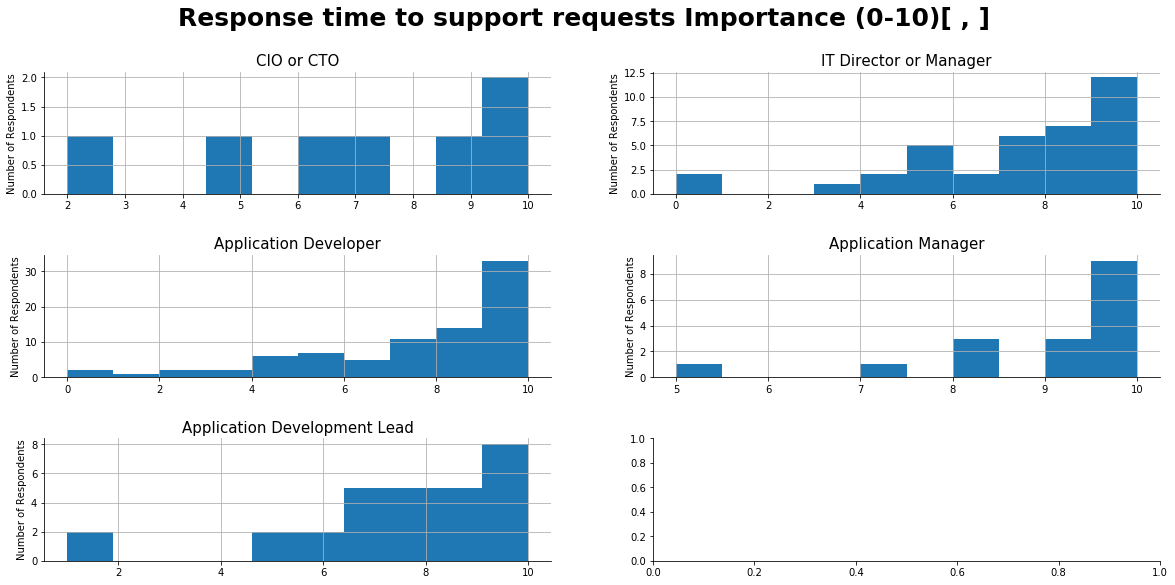

In [182]:
for var2 in y0_list+x0_list+y1_list+x1_list+y2_list+x2_list+y3_list+x3_list:
# var = 'OJavaSESubscription_Attr_Imp_RepsonseTime'
    var1='Job_Title'
    grouped = mod_df.groupby(var1)[var2]

    ncols=2
    nrows = int(np.ceil(grouped.ngroups/ncols))

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols)

    for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
        grouped.get_group(key).plot.hist(ax=ax,legend=None)
        title = varkey[(varkey['var']==var1)&(varkey['val']==key)].A.values[0]
        ax.set_title(title,size=15)
        ax.set_ylabel("Number of Respondents")
        fig.subplots_adjust(hspace = .5)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.grid()


    fig.suptitle(varkey[(varkey['var']==var2)].Q.values[0],size=25, fontweight='bold')
    fig.savefig("../data/output/slides/xtabs/"+var2+"_"+var1+".jpeg",bbox_inches='tight')
    ax.clear()

In [181]:
varkey[(varkey['var']==var)]

var  val                                                         Q    A A_short  grp grp_str
OJavaSESubscription_Attr_Imp_RepsonseTime_0  OJavaSESubscription_Attr_Imp_RepsonseTime    0  Response time to support requests Importance (0-10)[ , ]  NaN     NaN  NaN     NaN

In [178]:
print(var)
varkey#[(varkey['var']==var)&(varkey['val']==key)]#.A.values[0]

OJavaSESubscription_Attr_Imp_RepsonseTime


var  val                                                                                                                                                                                                                                                                                                                                  Q                                                                                                                                                            A                                             A_short  grp                            grp_str
Job_Title_1                                                                                              Job_Title    1                                                                                                                                                                                                                                                                                                            What is your job title?                                                                                                                                                   CIO or CTO                                                 NaN  1.0                         Teach Lead
Job_Title_2                                                                                              Job_Title    2                                                                                                                                                                                                                                                                                                            What is your job title?                                                                                                                                       IT Director or Manager                                                 NaN  1.0                         Teach Lead
Job_Title_3                                                                                              Job_Title    3                                                                                                                                                                                                                                                                                                            What is your job title?                                                                                                                                        Application Developer                                                 NaN  2.0                  Application Owner
Job_Title_4                                                                                              Job_Title    4                                                                                                                                                                                                                                                                                                            What is your job title?                                                                                                                                          Application Manager                                                 NaN  2.0                  Application Owner
Job_Title_5                                                                                              Job_Title    5                                                                                                                                                                                                                                                                                                            What is your job title?                                                                                                                                 Application Development Lead                                                 NaN

Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Other
Teach Lead
Application Owner
Ot

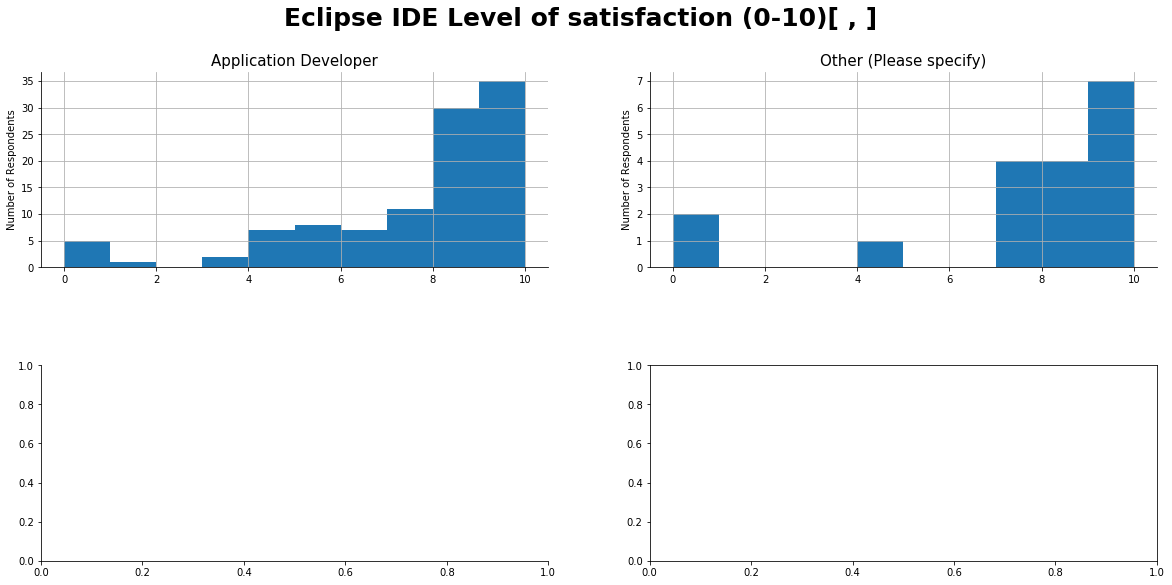

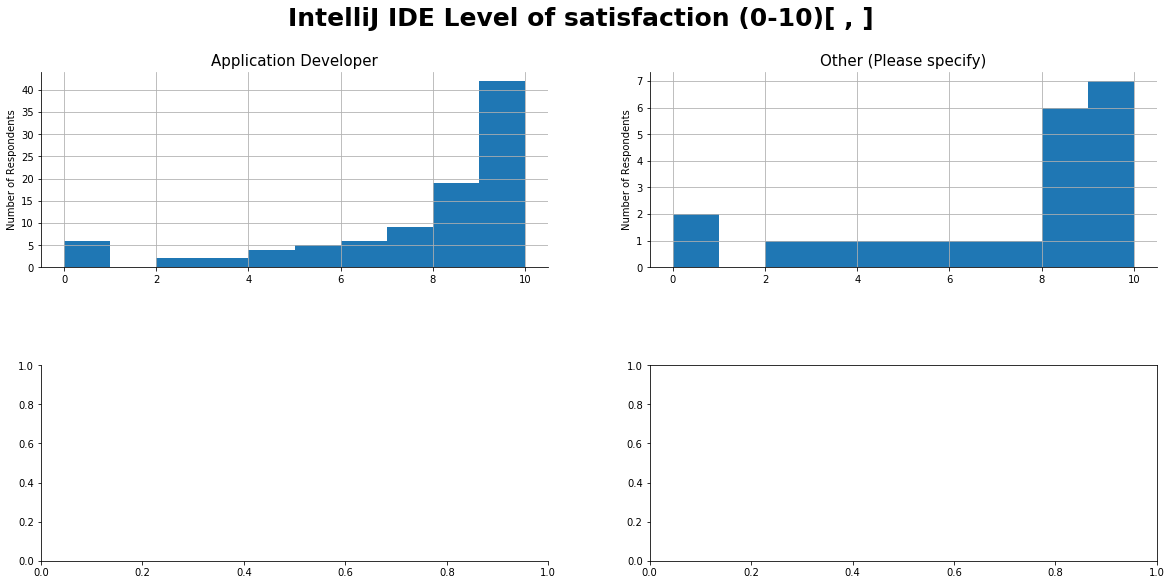

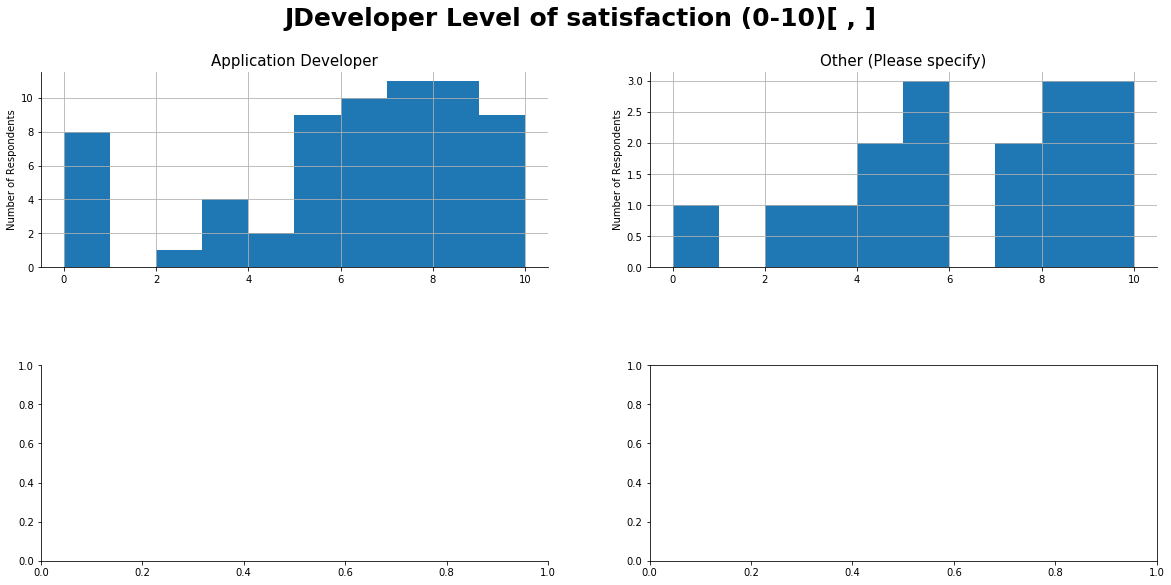

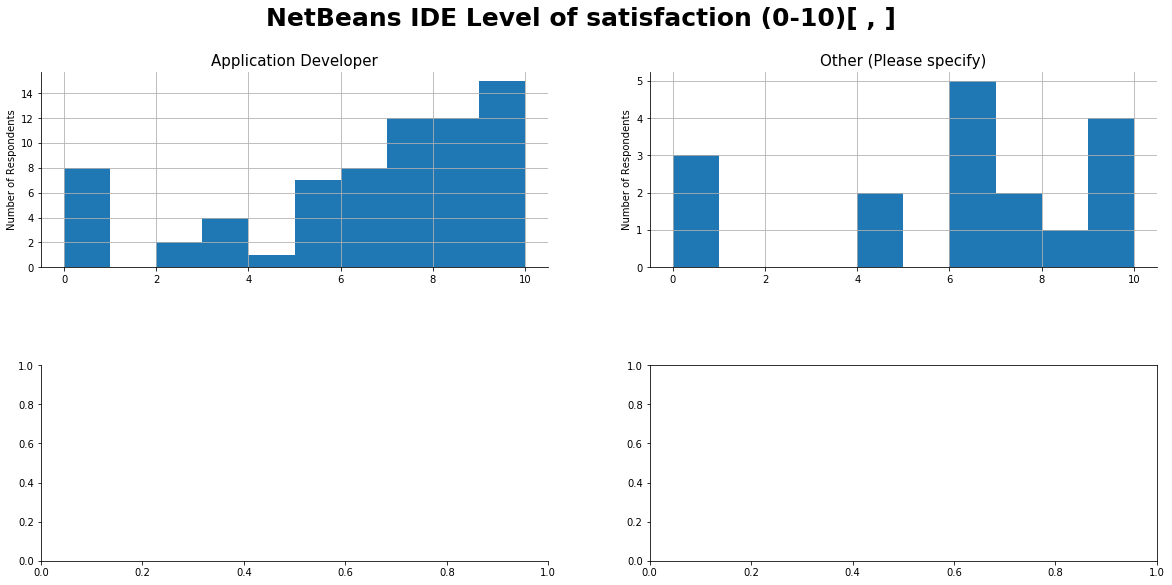

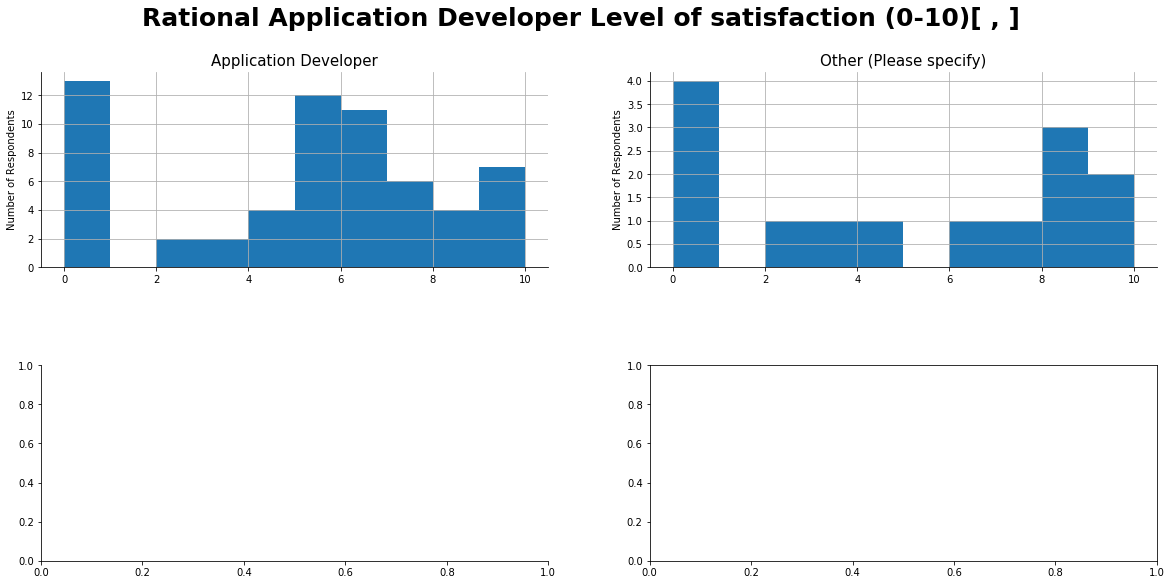

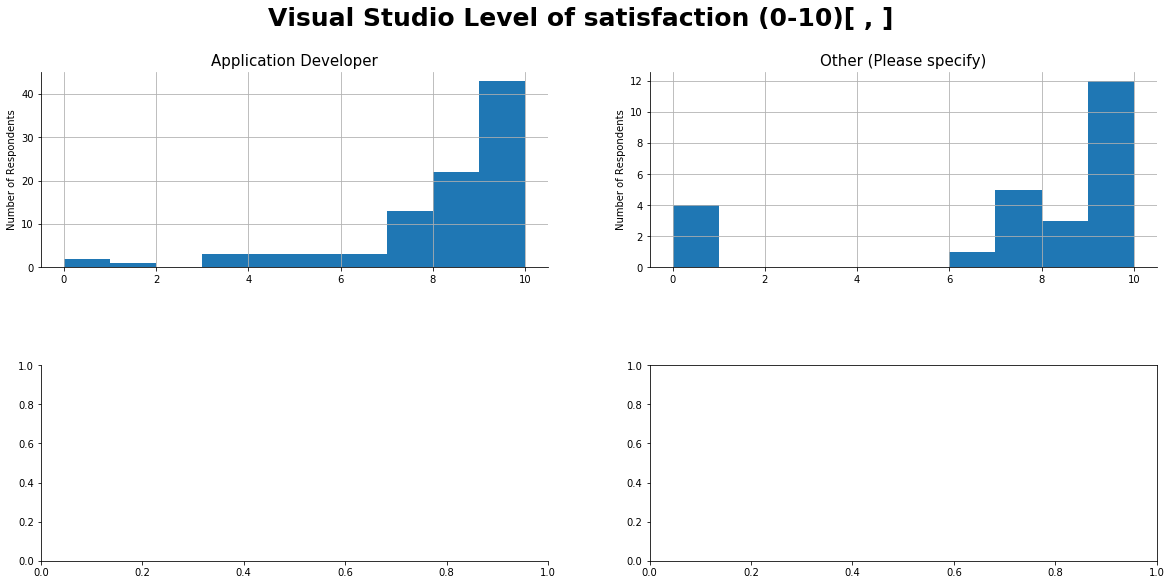

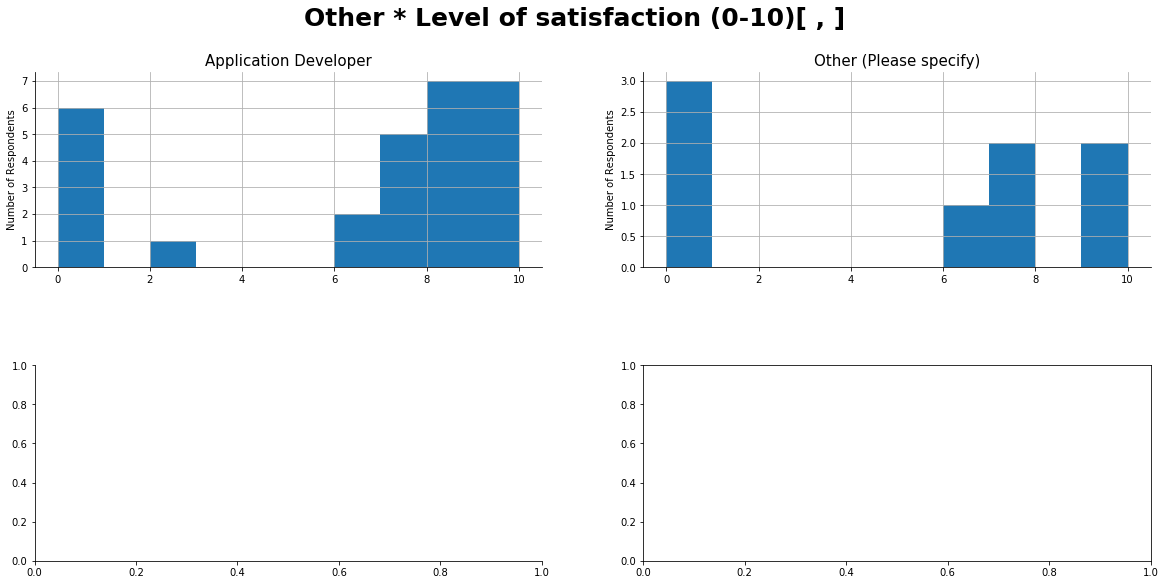

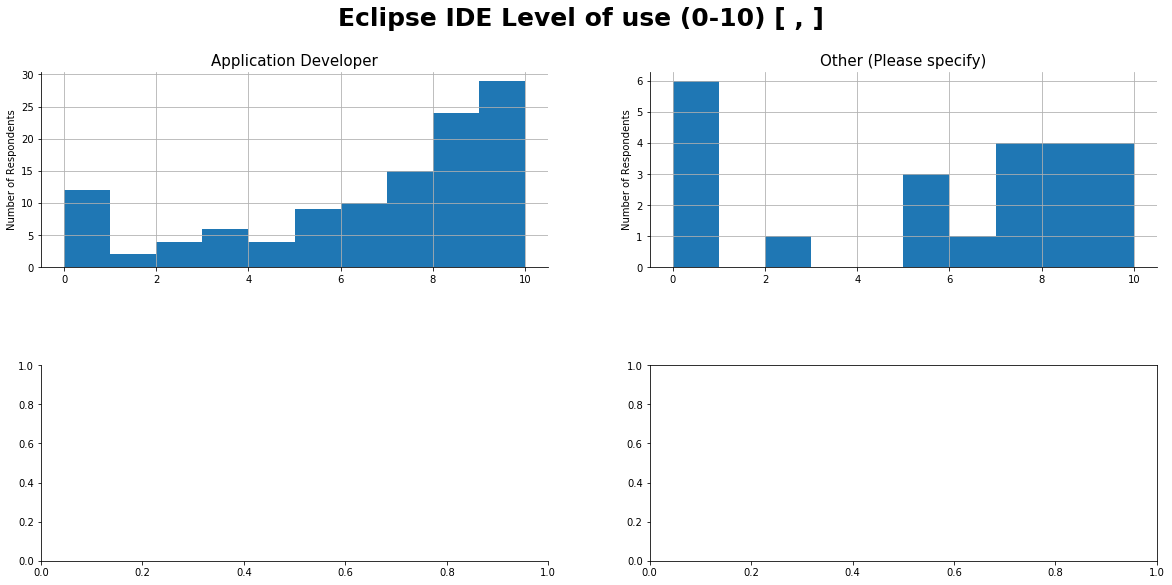

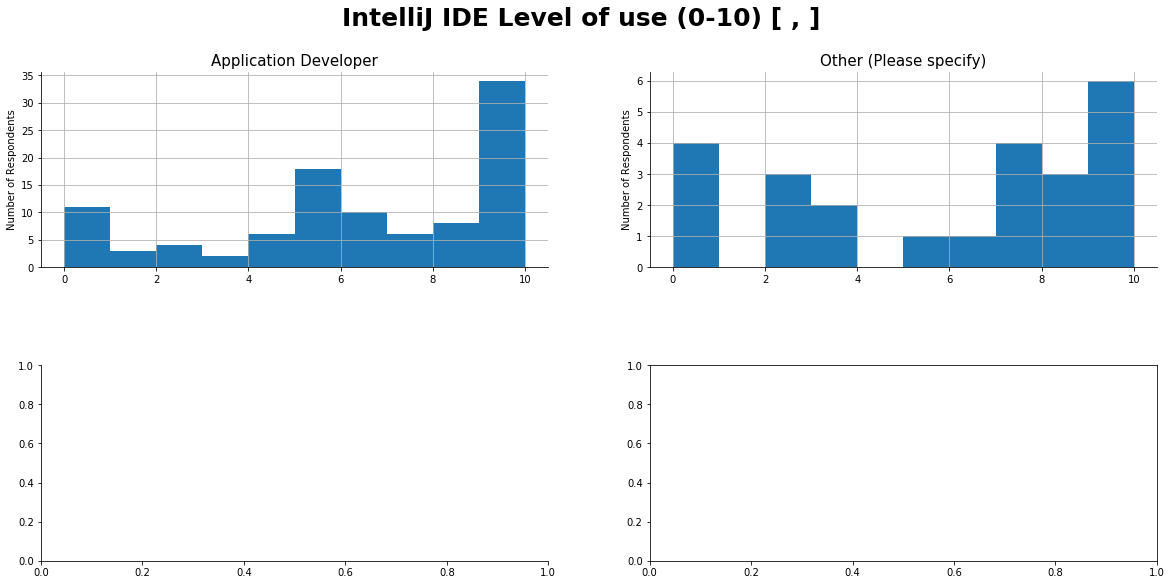

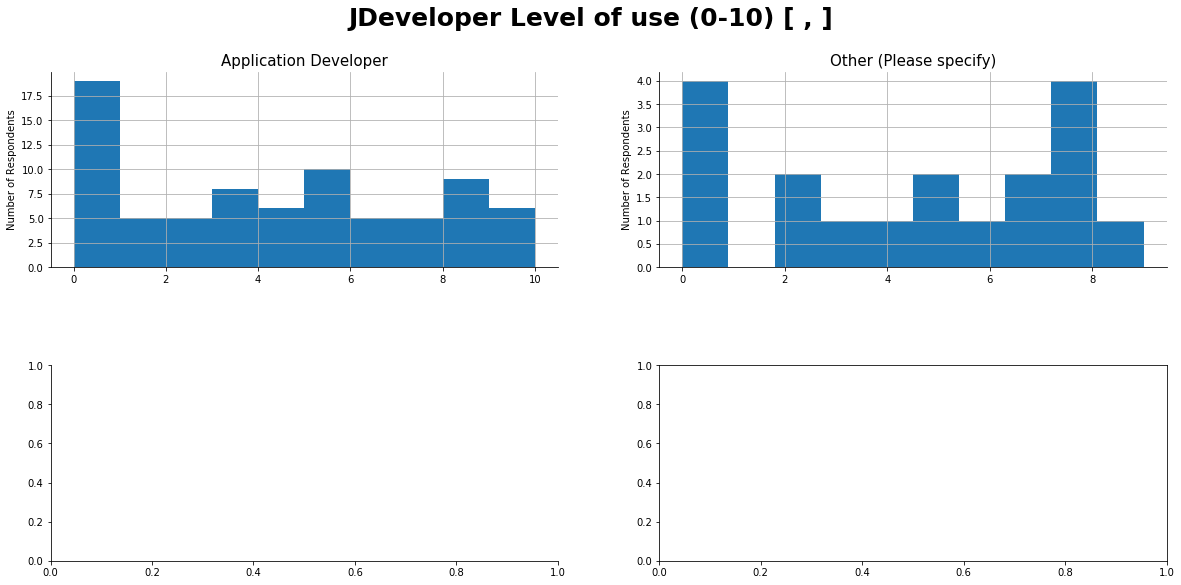

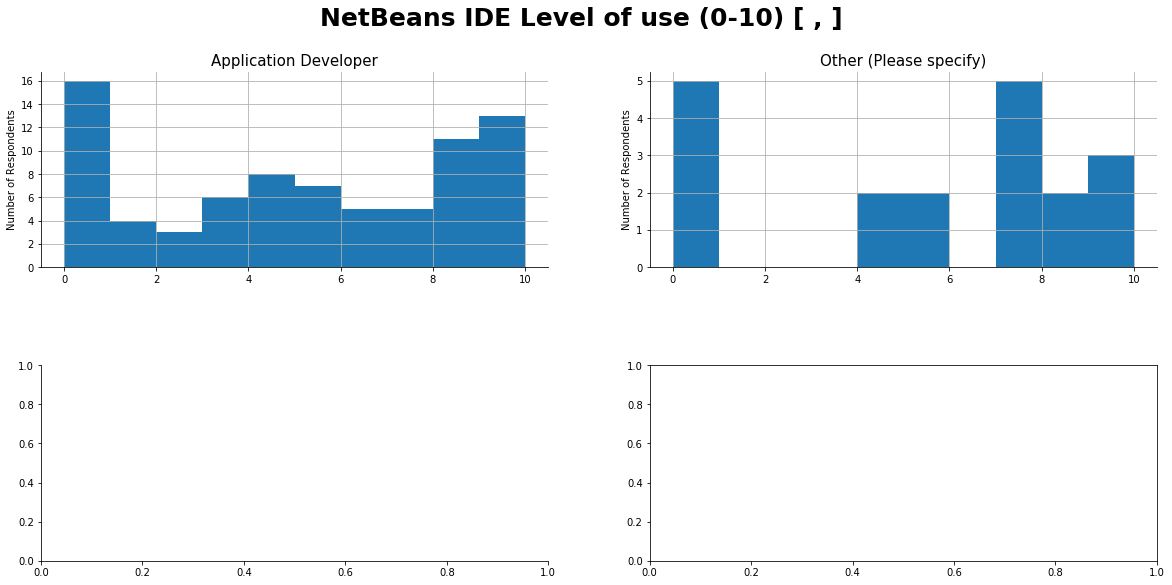

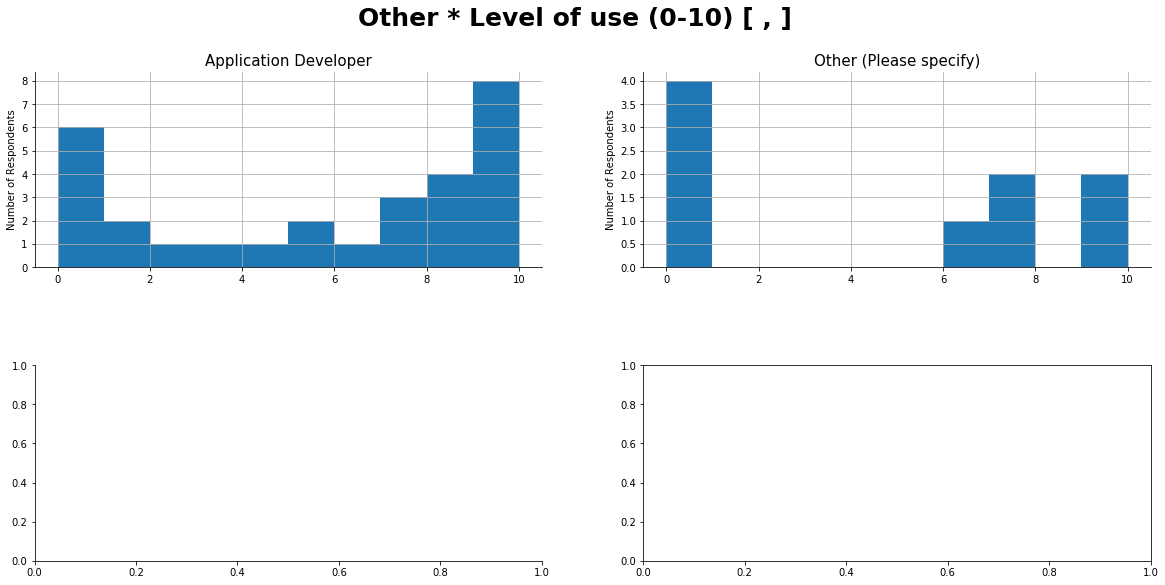

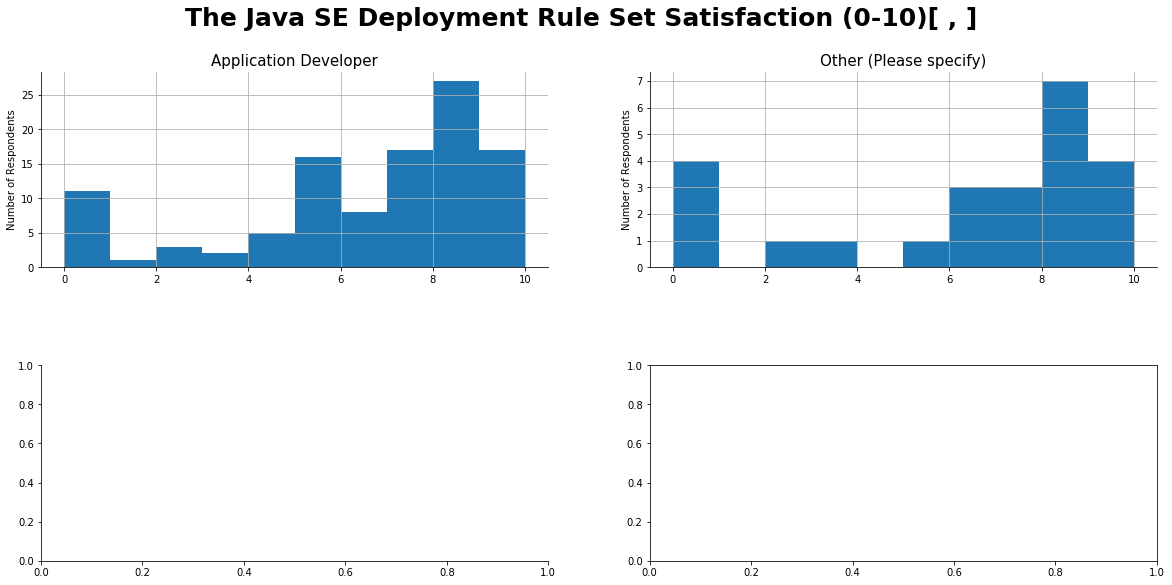

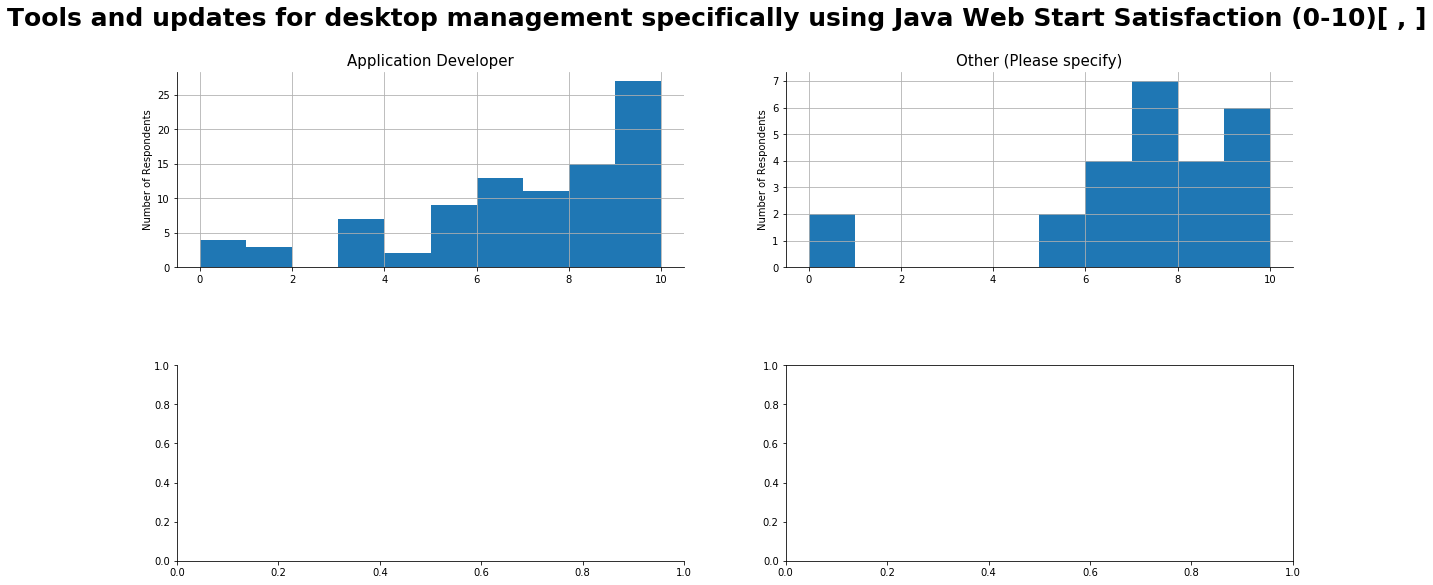

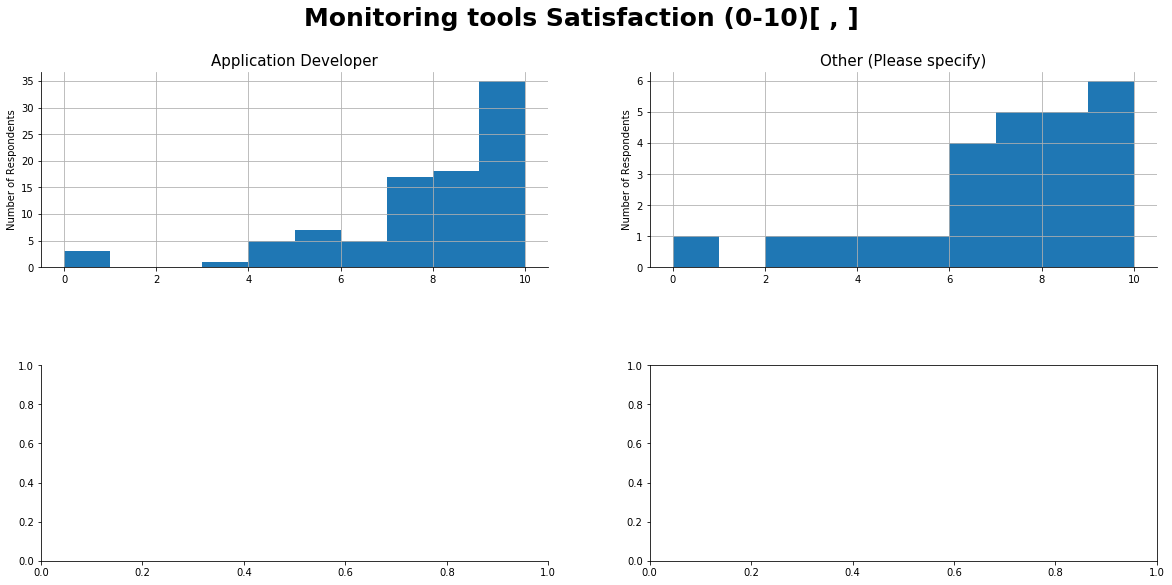

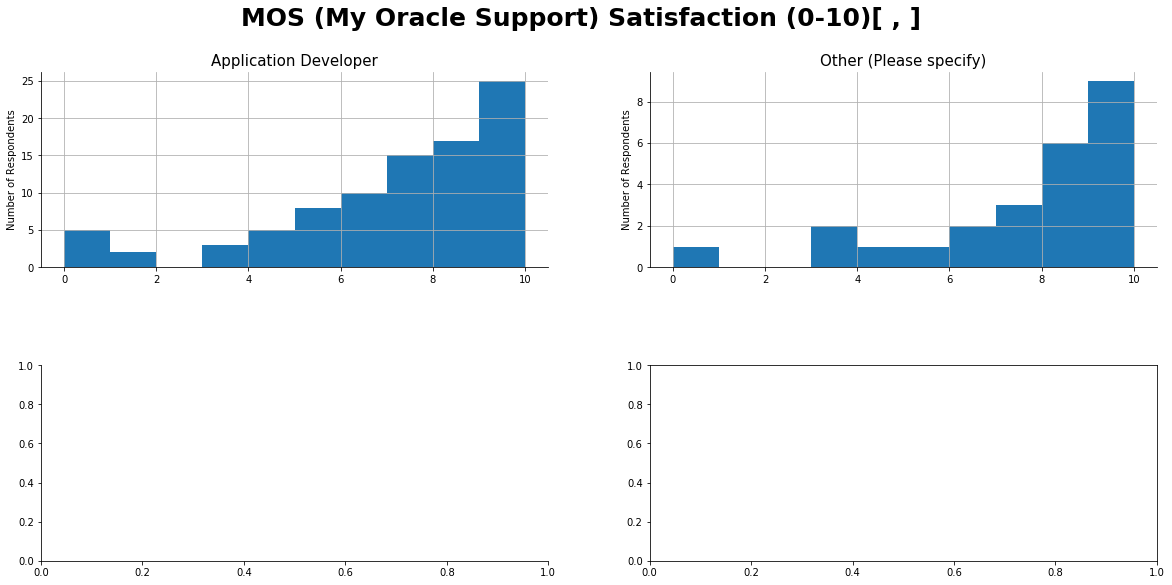

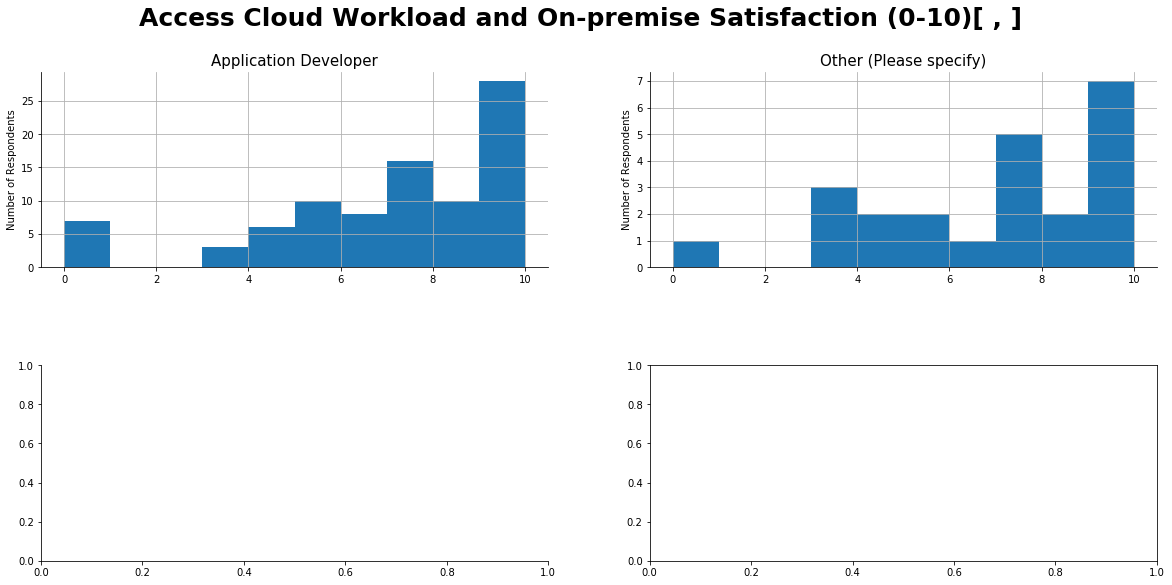

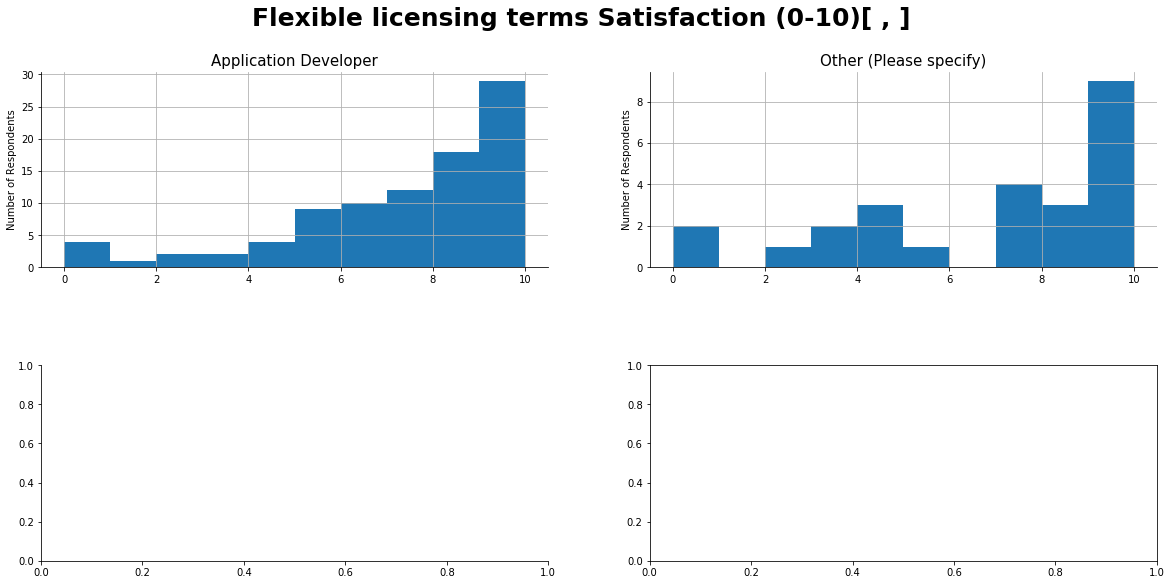

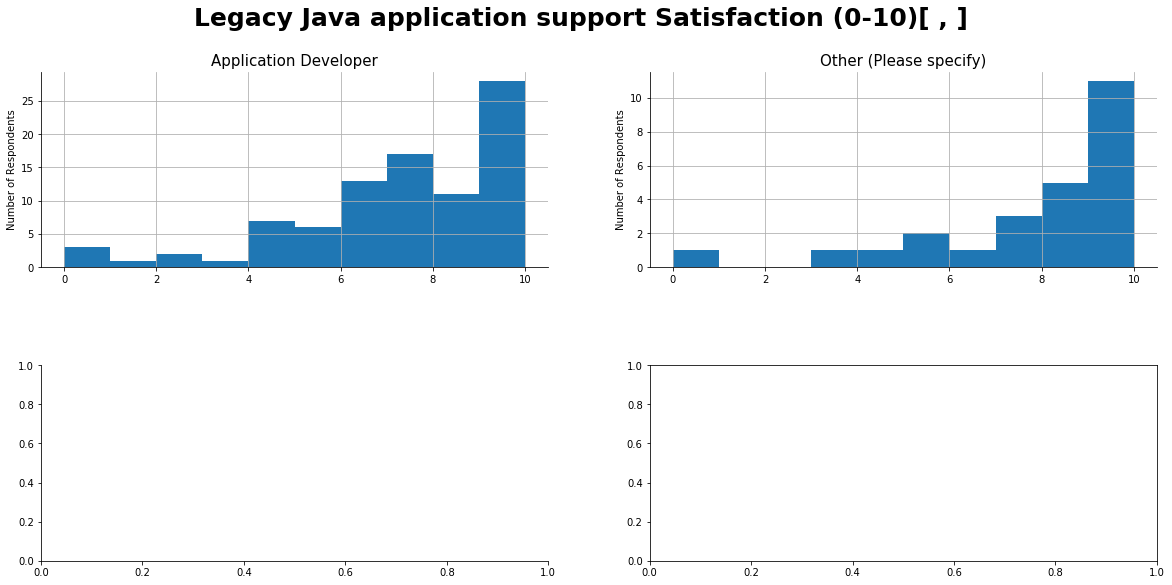

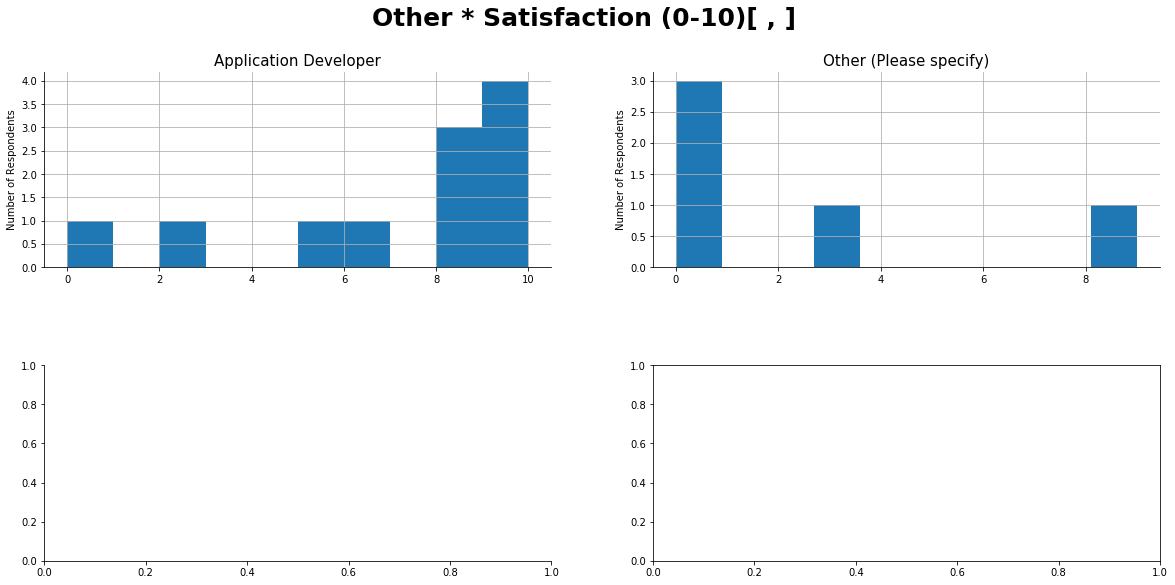

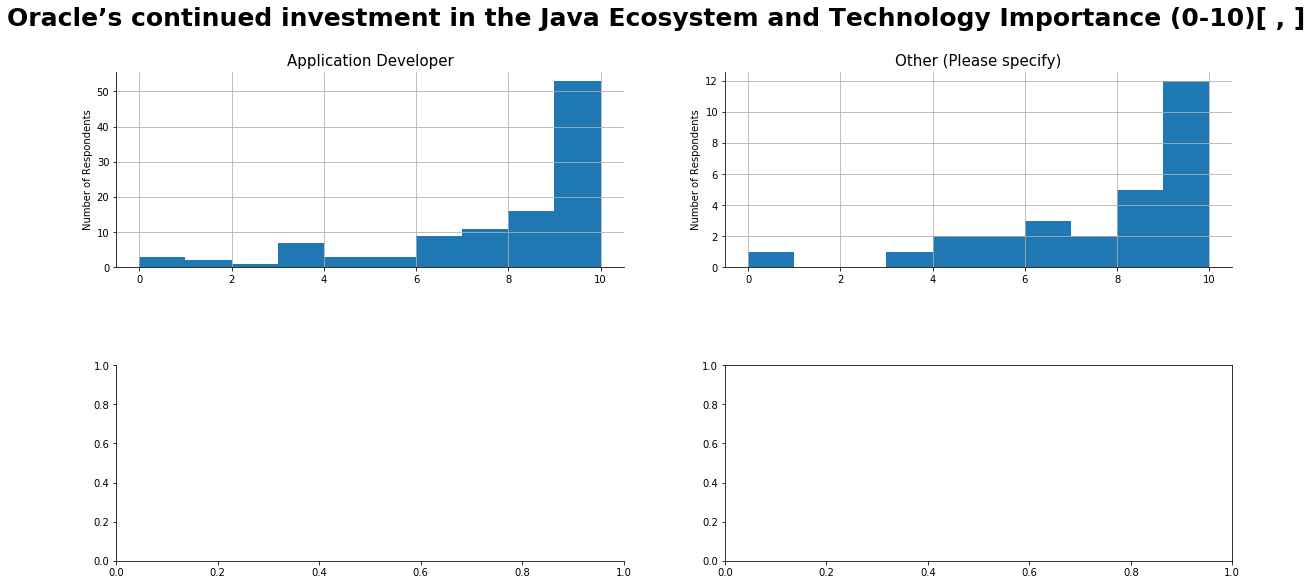

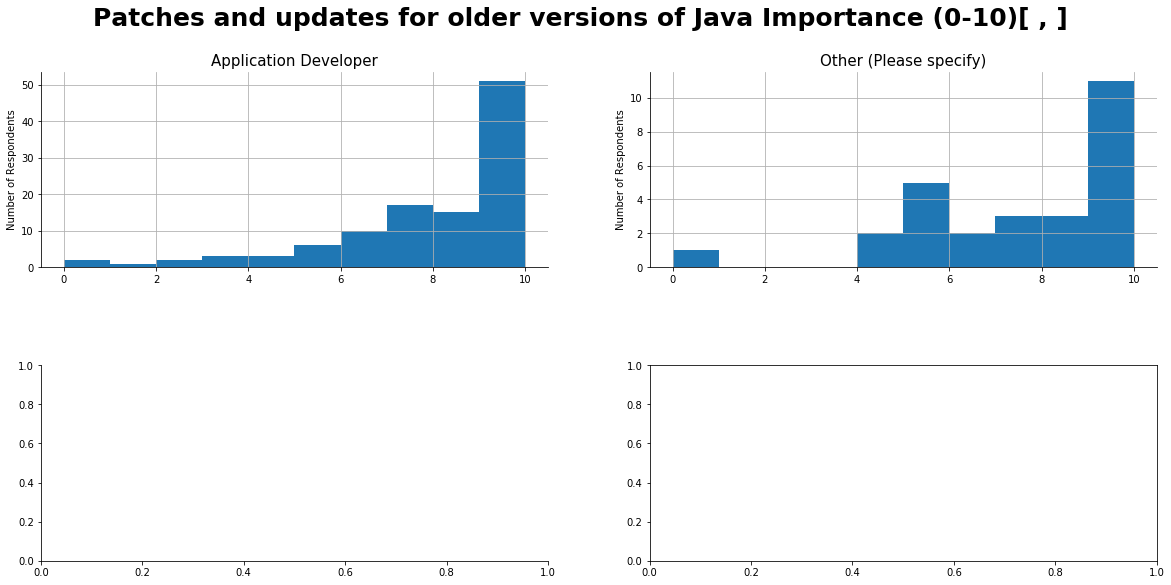

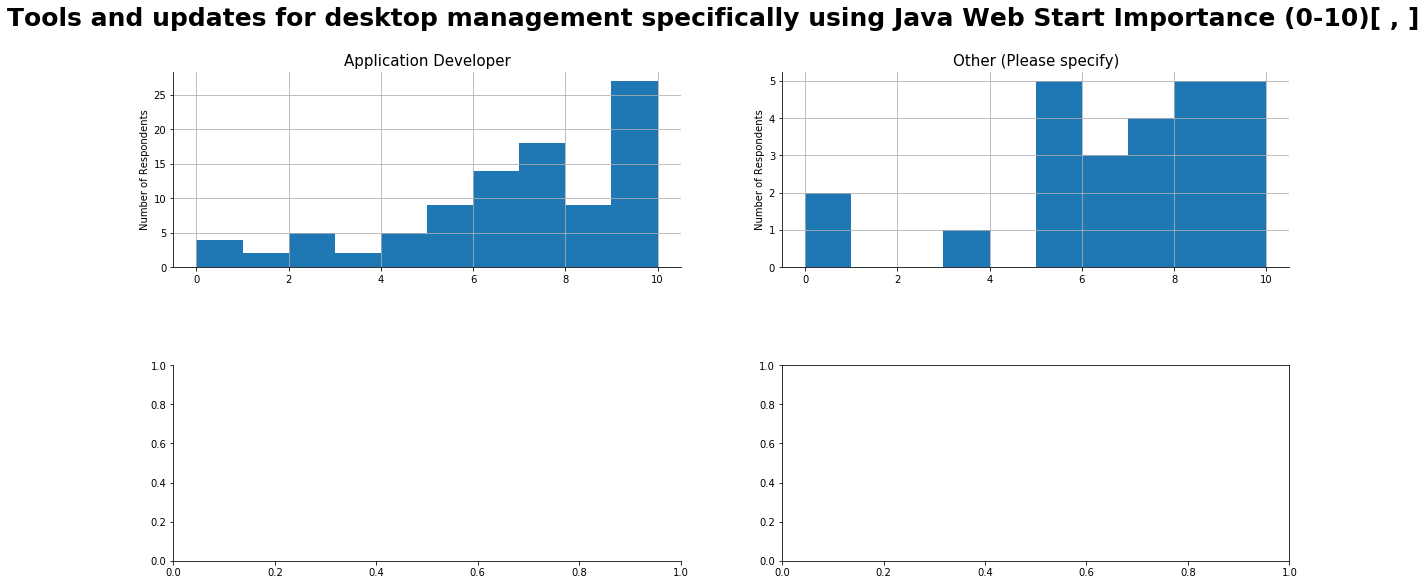

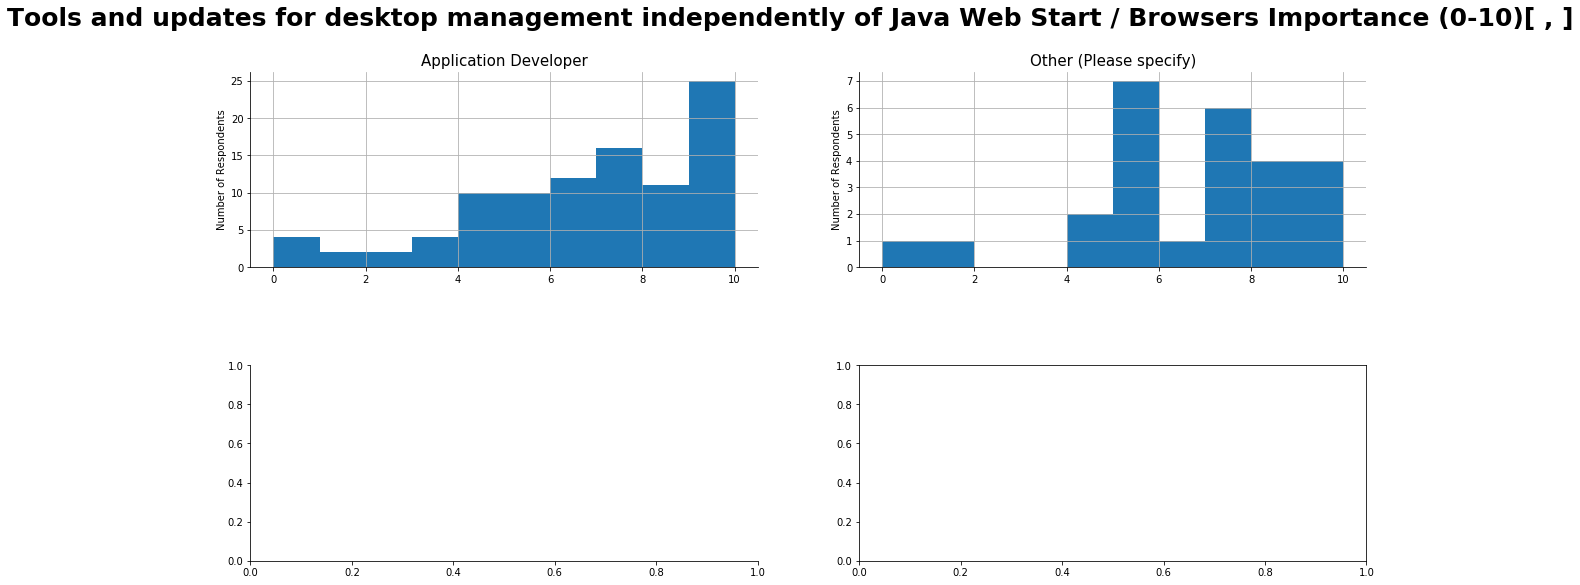

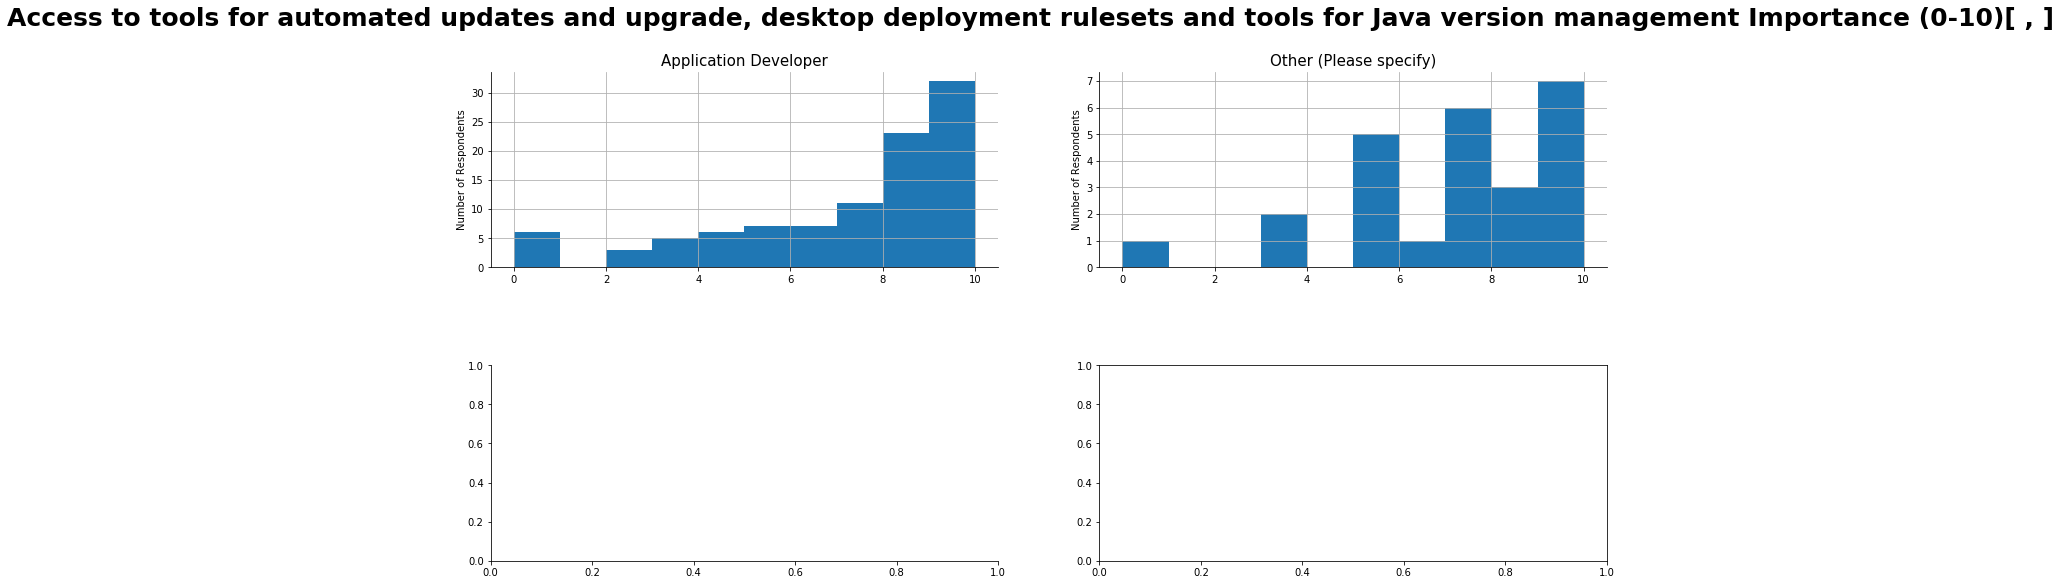

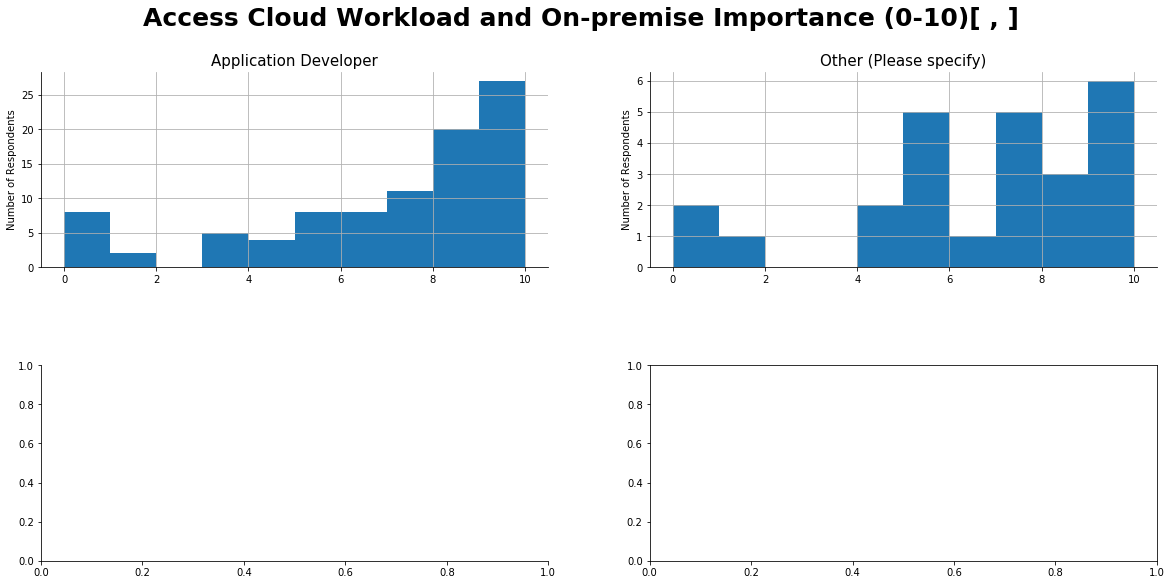

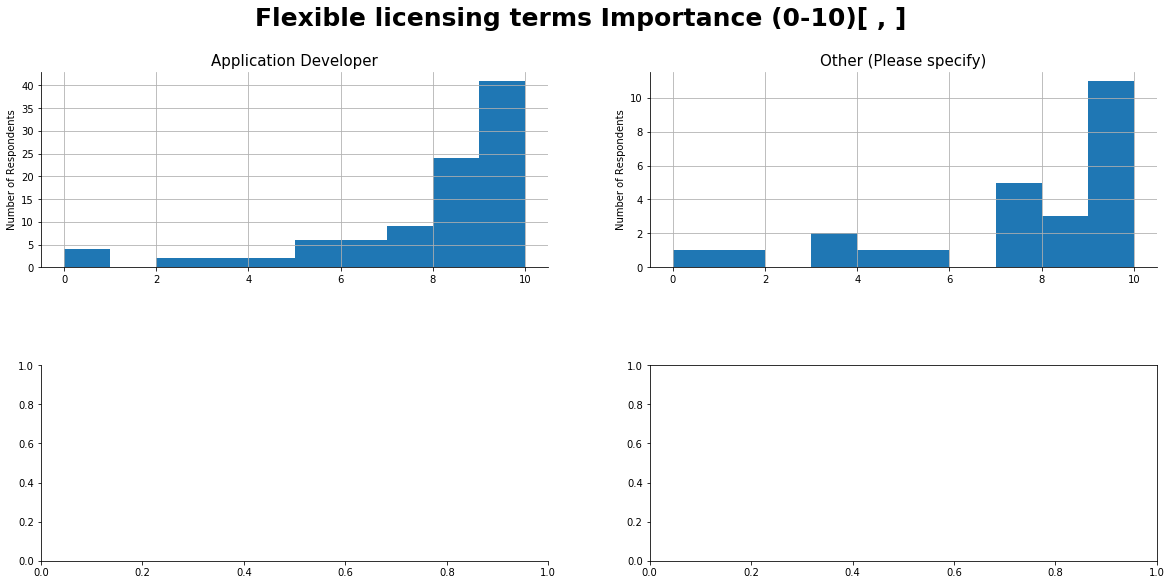

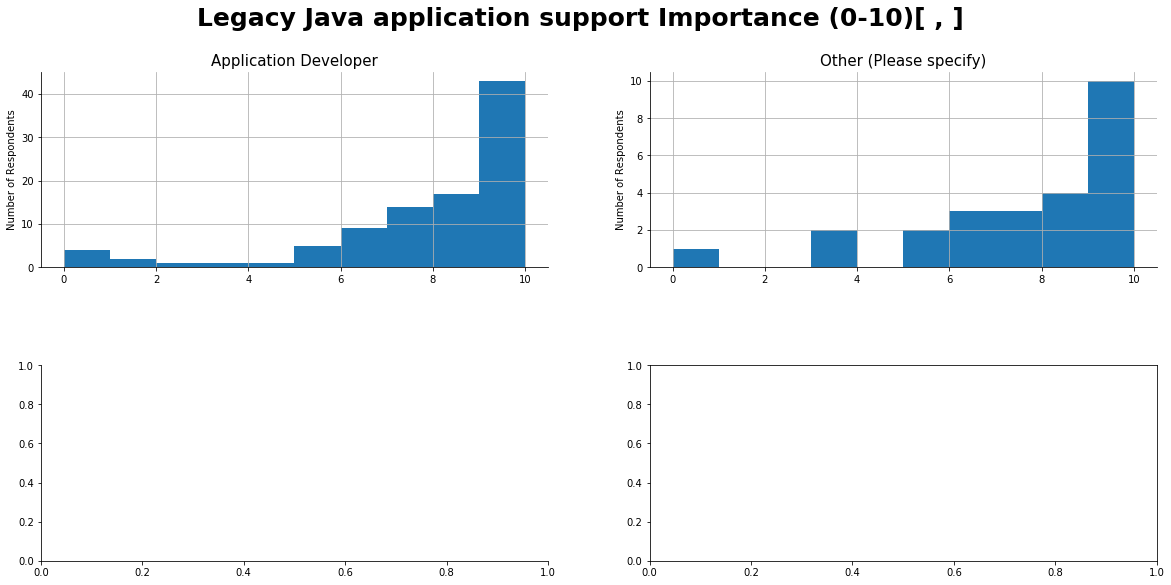

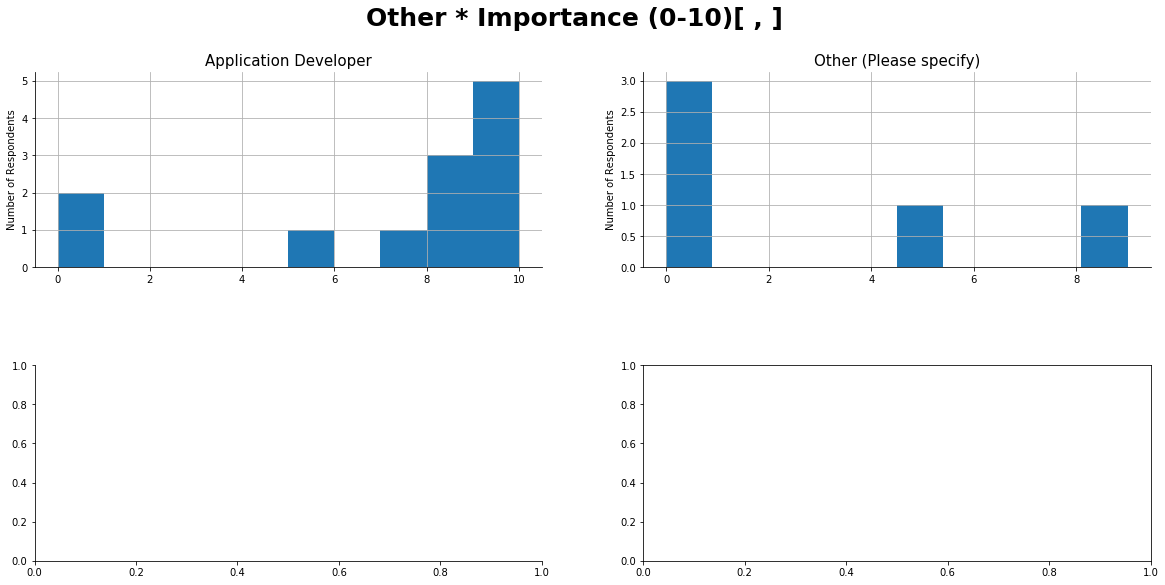

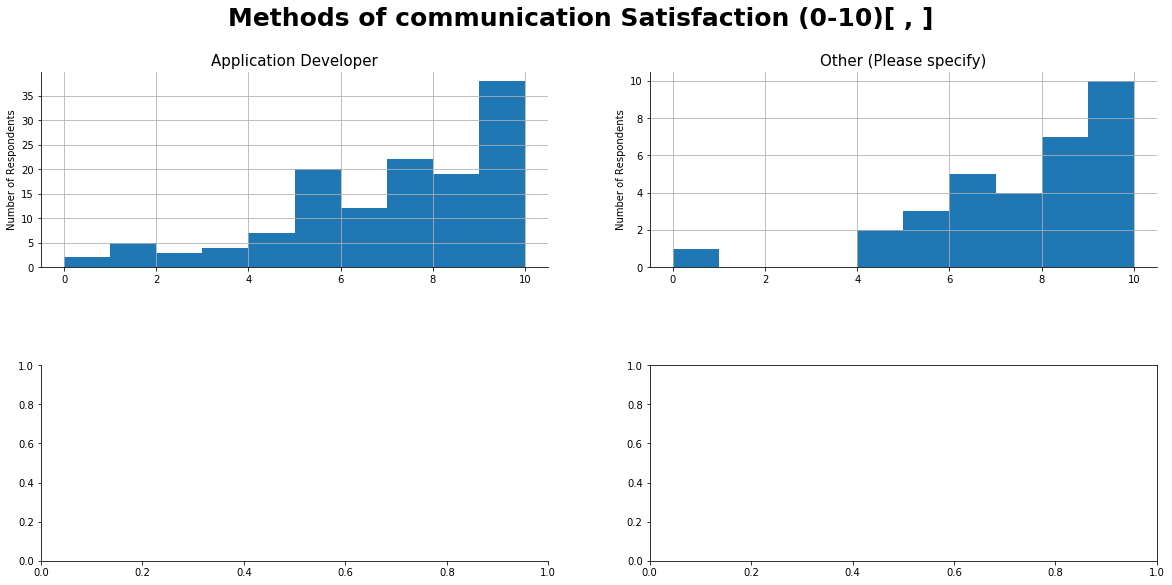

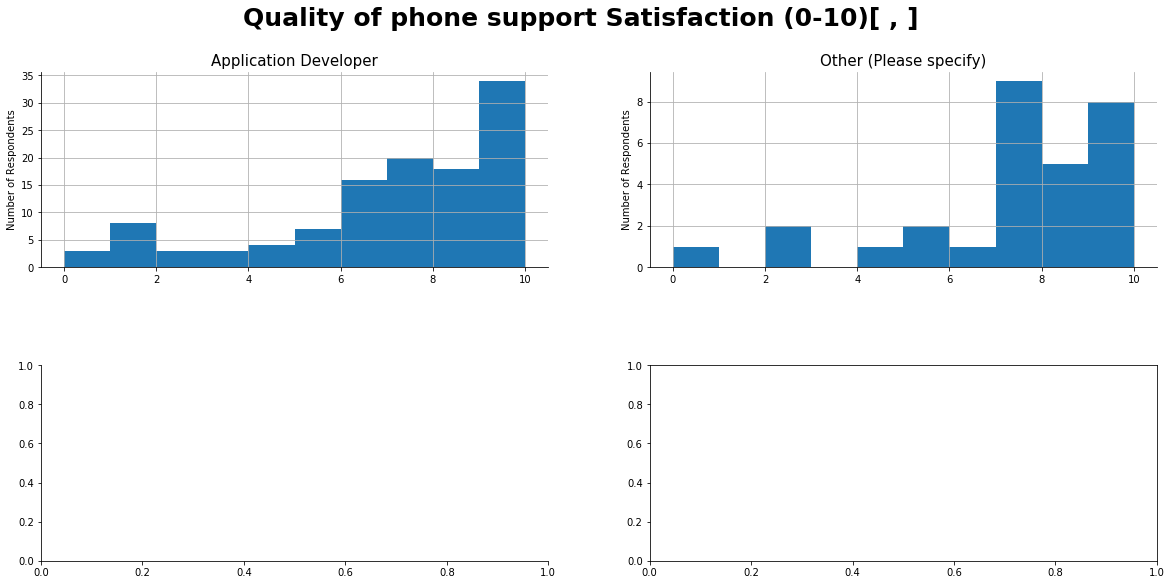

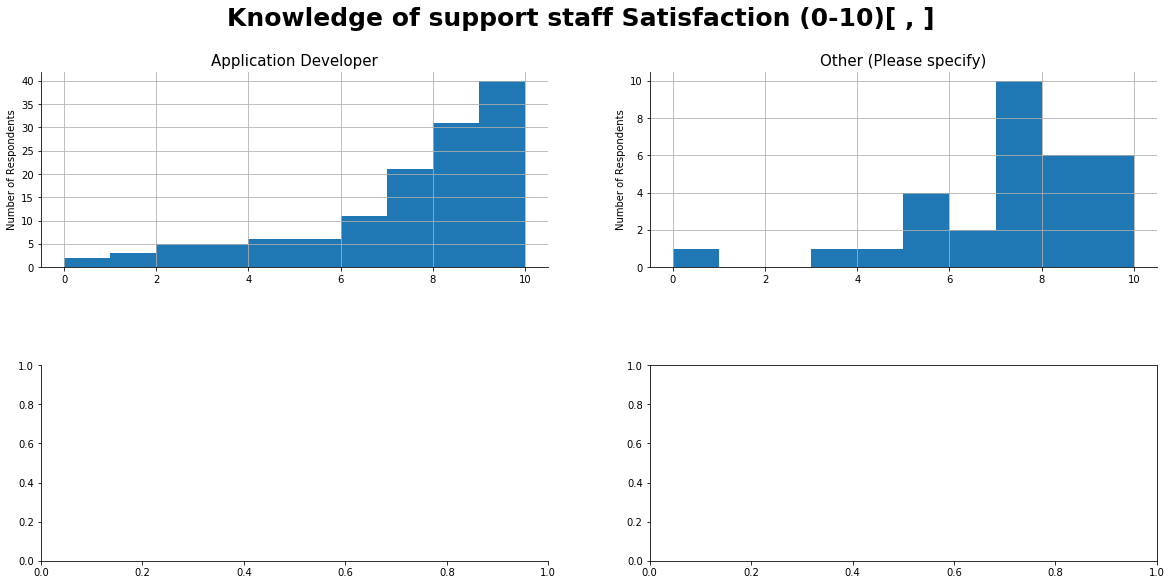

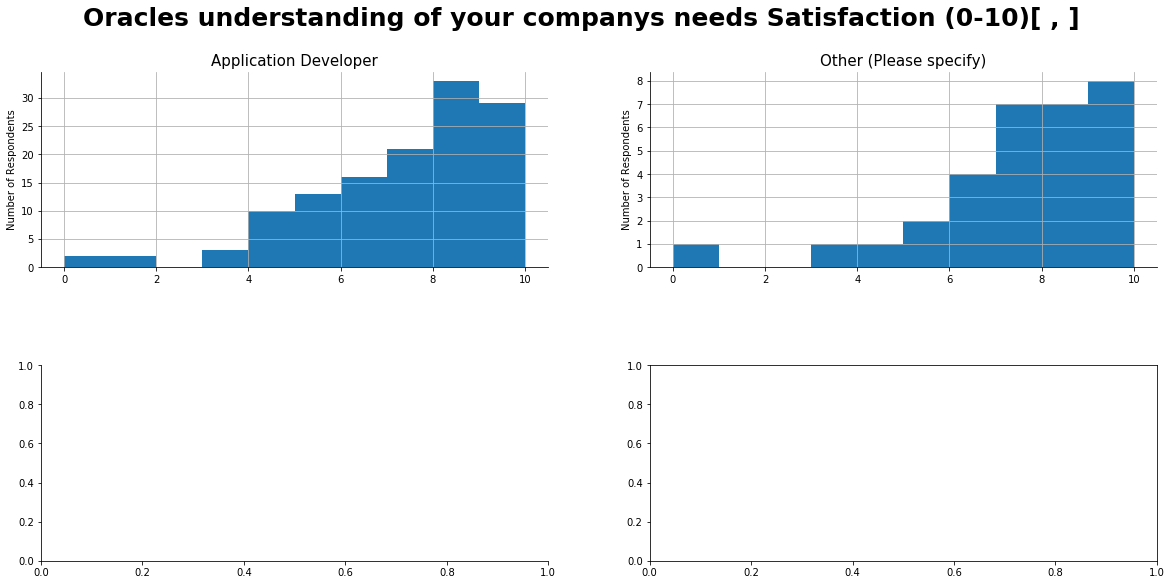

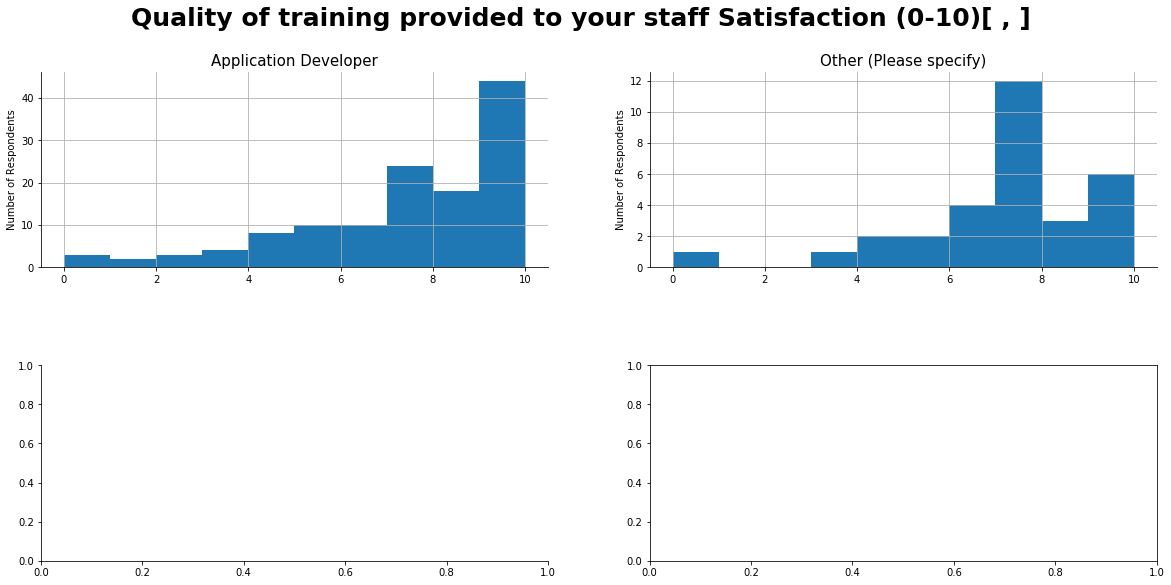

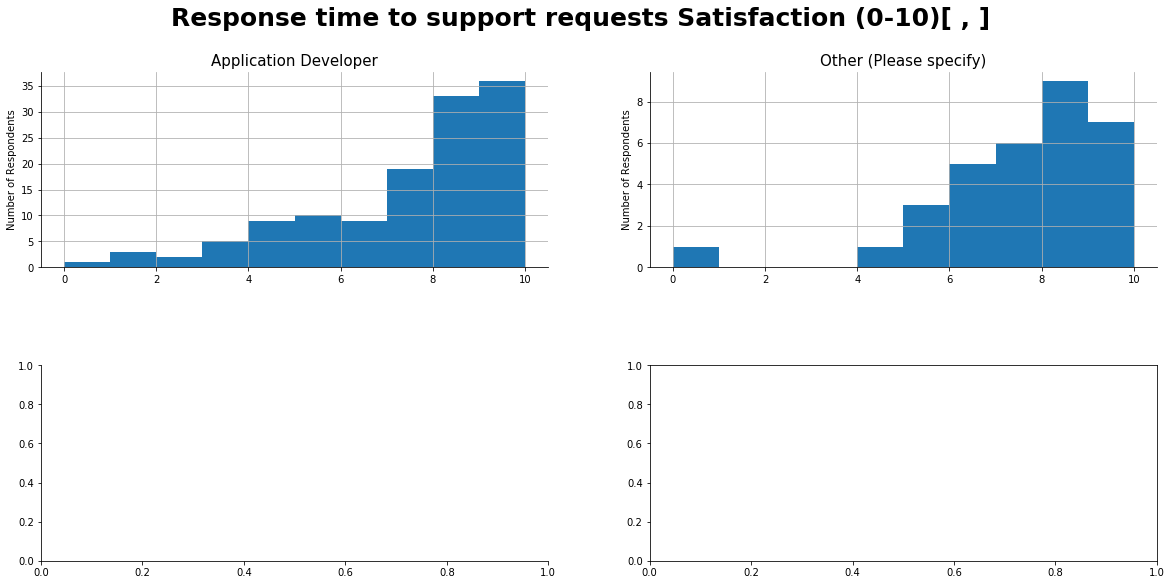

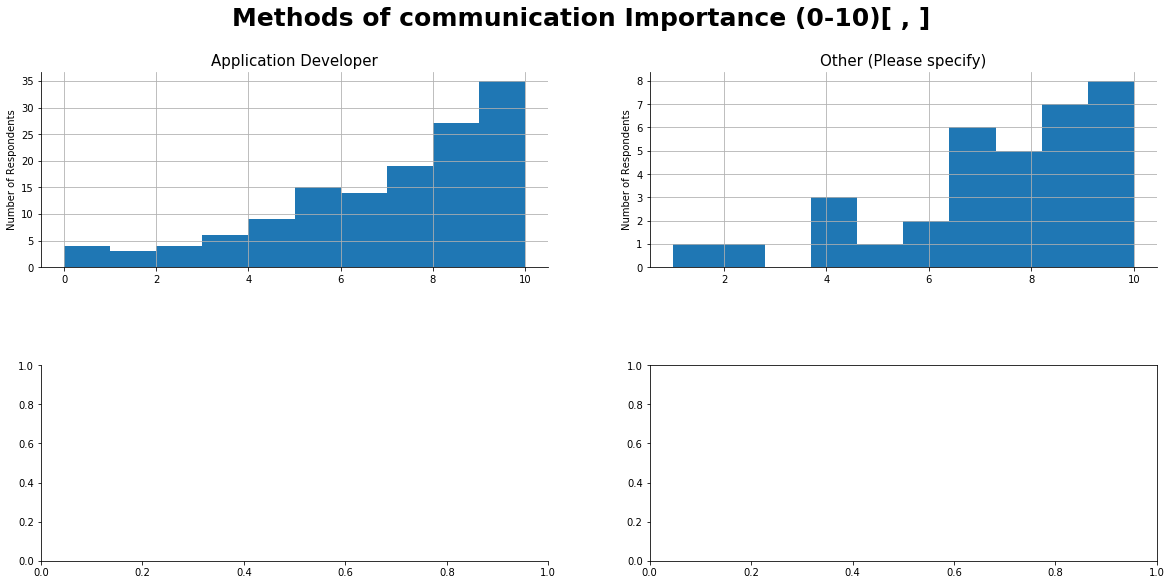

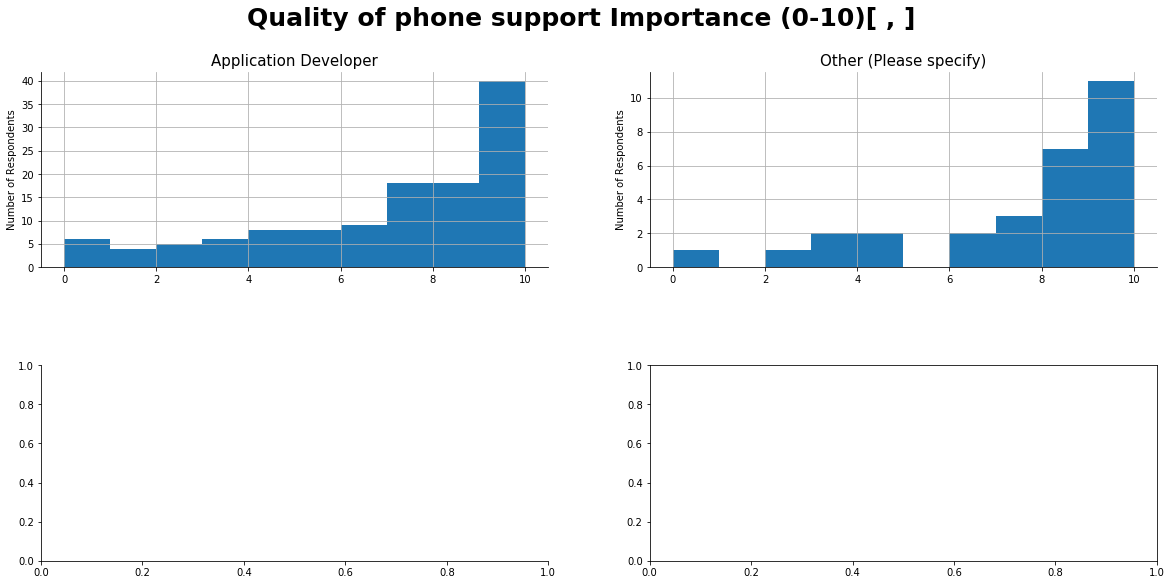

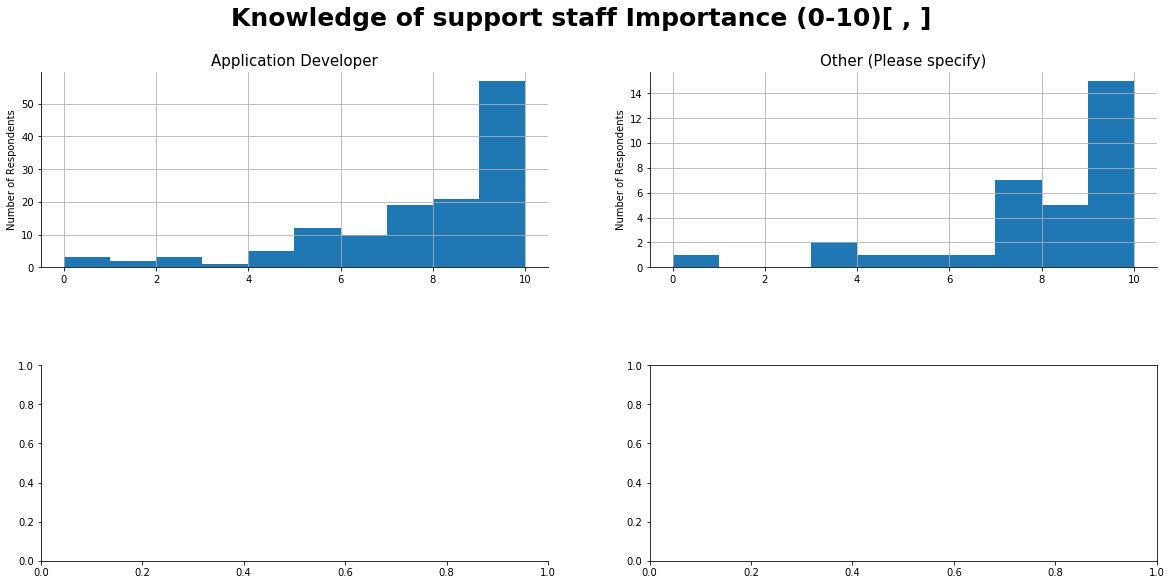

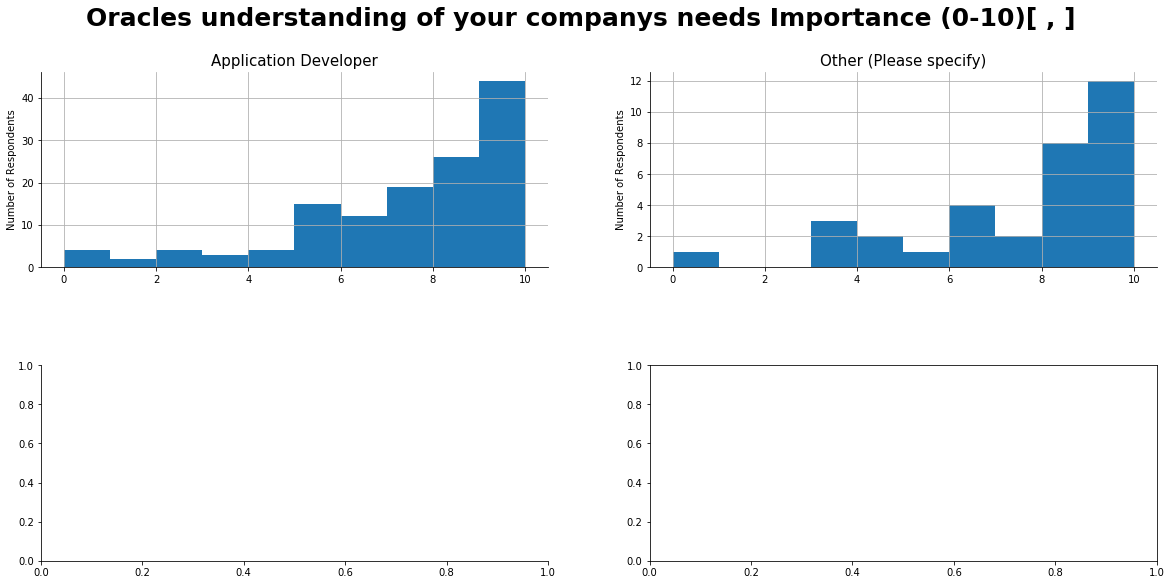

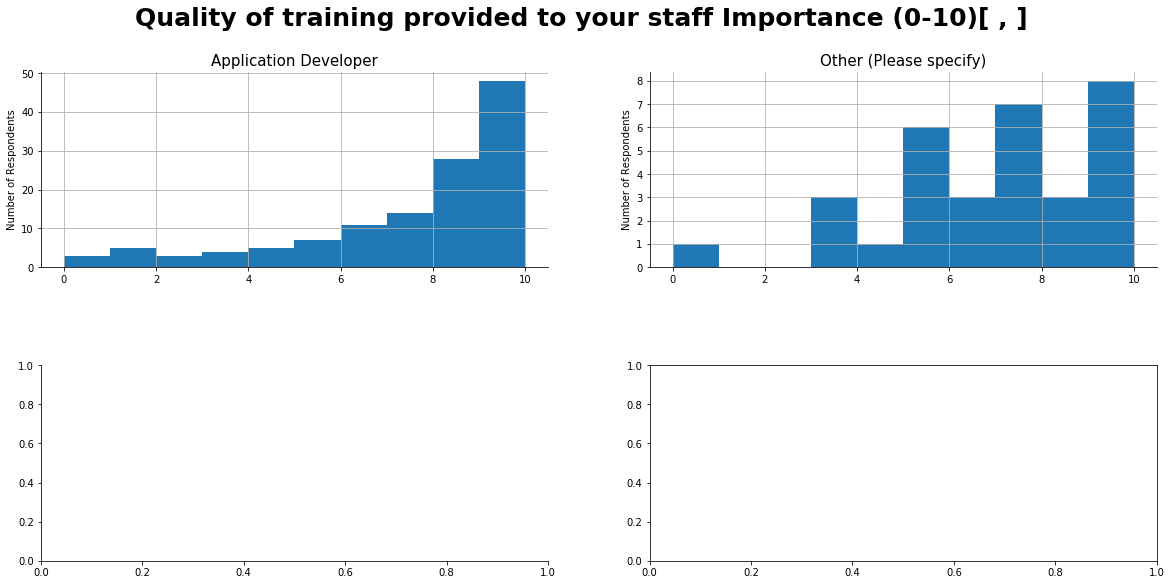

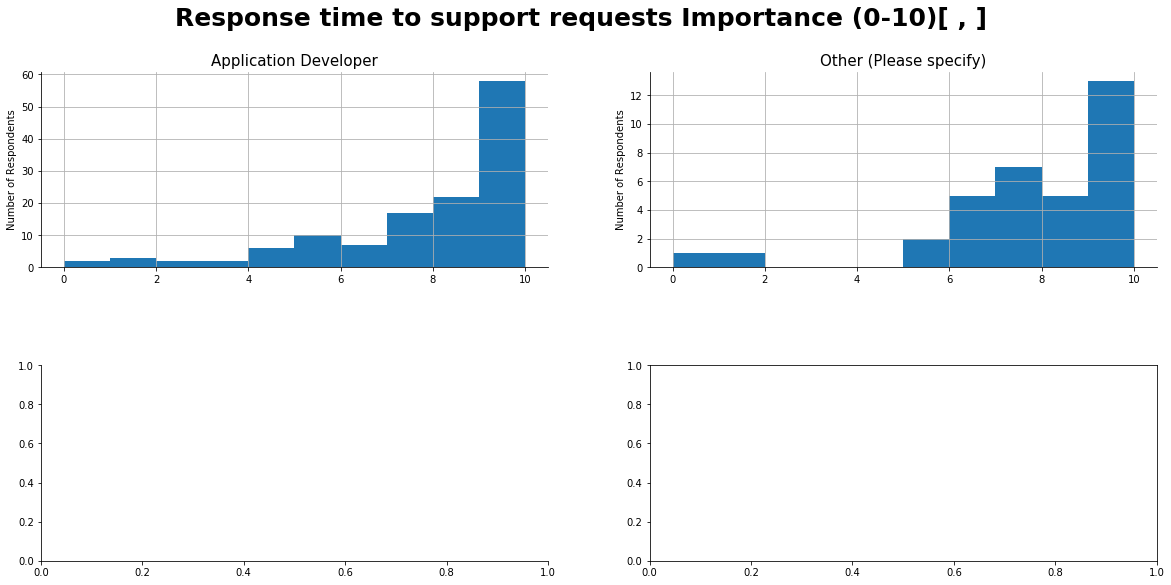

In [161]:
for var2 in y0_list+x0_list+y1_list+x1_list+y2_list+x2_list+y3_list+x3_list:
    var1='Job_Title'

    var=var2

    temp = mod_df[[var1,var2]].merge(varkey[(varkey['var']==var1)], left_on='Job_Title', right_on='val', how='left')
    grouped = temp.groupby('grp_str')[var2]

    ncols=2
    nrows = int(np.ceil(grouped.ngroups/ncols))

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols)

    for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
        print(key)
        grouped.get_group(key).plot.hist(ax=ax,legend=None)
        title = temp[temp['grp_str']==key].A.values[0]
        ax.set_title(title,size=15)
        ax.set_ylabel("Number of Respondents")
        fig.subplots_adjust(hspace = .5)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.grid()


    fig.suptitle(varkey[(varkey['var']==var2)].Q.values[0],size=25, fontweight='bold')
    fig.savefig("../data/output/slides/xtabs/"+var2+"_"+var1+"_grp.jpeg",bbox_inches='tight')
    ax.clear()

# Frequencies for all Questions

In [360]:
[x for x in modw_df.columns]

['Response_ID',
 'IP_Address',
 'Timestamp',
 'Duplicate',
 'Time_Complete_s',
 'Seq._Number',
 'External_Reference',
 'Custom_Variable_1',
 'Custom_Variable_2',
 'Custom_Variable_3',
 'Custom_Variable_4',
 'Custom_Variable_5',
 'Respondent_Email',
 'Email_List',
 'Country_Code',
 'Region',
 'Survey_Pre_Qual',
 'Job_Title',
 'Job_Title_Other',
 'Company_Industry',
 'Company_Industry_Other]',
 'Company_Revenue',
 'OracleJavaSESubscription_Org_Duration',
 'Java_App_Org_Deploy_2020',
 'OracleJavaSESubscription_Ind_Role',
 'OracleJavaSESubscription_Ind_Role_Other',
 'Survey_Consent',
 'Government_Org_Ind_Employee',
 'Gift_Card_Confirm',
 'Company_Name',
 'Thank_You',
 'Title',
 'Country',
 'State',
 'App_Dev_Outsource',
 'Java_Dev_Org',
 'Java_Dev_Dist_Org',
 'Java_Dev_Dist_JVM',
 'Java_Dev_Dist_Python',
 'Java_Dev_Dist_JavaScript',
 'Platform_Dev_Org_Primary',
 'Platform_Dev_Org_Comment',
 'Platform_Dev_Org_LRHEL_P',
 'Platform_Dev_Org_LOracle_P',
 'Platform_Dev_Org_LUbuntu_P',
 'Platform

In [267]:
# len(catg_dummy_list)+len(cont_dummy_list)+len(dummy0_dummy_list)

# Basic Graph
## Used for var = ['Country_Code']

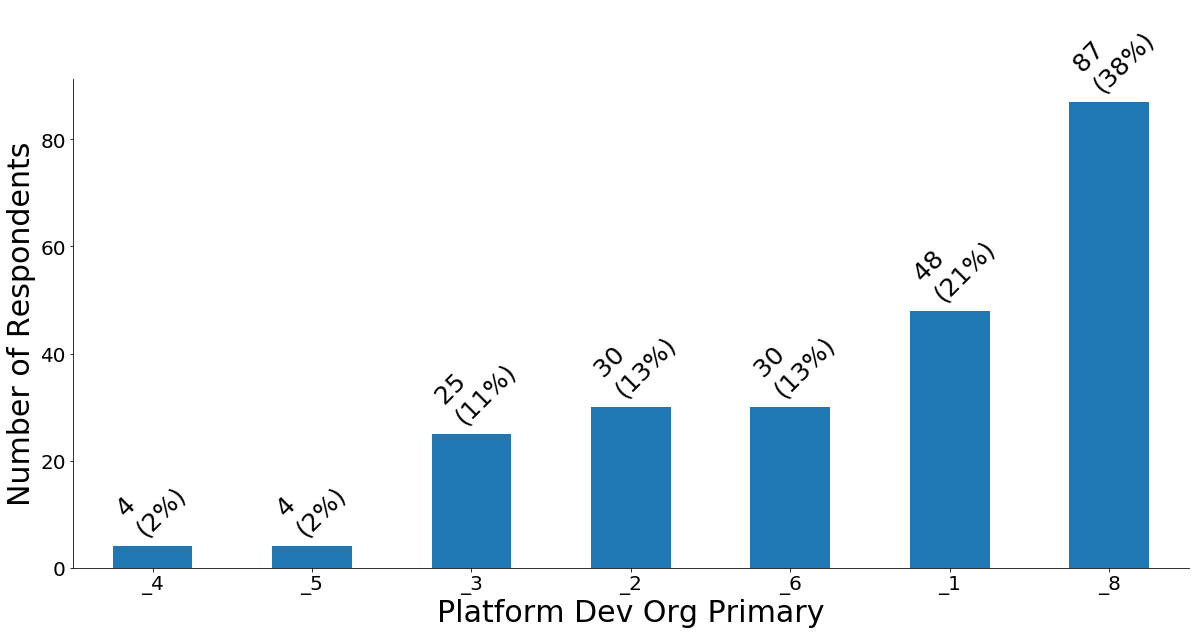

In [351]:
var = "Platform_Dev_Org_Primary"
var_str = var.replace("_"," ").strip()
temp = modw_df.filter(regex=var).sum().sort_values(ascending=True)
temp = temp.rename(lambda x: x.replace(var,''))
temp = temp[temp < 228]

ax = temp[:,].plot.bar(rot=0, fontsize = 20)
for p in ax.patches:
    ann_txt = str(p.get_height()) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=45)

# Basic Graph - numeric Input
## Used for ['Java_Dev_Org', 'Java_Dev_Org',
 'Java_Dev_Dist_JVM',
 'Java_Dev_Dist_Python',
 'Java_Dev_Dist_JavaScript',
 Platform_Dev_Org_LRHEL_P',
'Platform_Dev_Org_LOracle_P',
'Platform_Dev_Org_LUbuntu_P',
'Platform_Dev_Org_LSUSE_P',
'Platform_Dev_Org_LinuxOther_P',
'Platform_Dev_Org_MacOS_P',
'Platform_Dev_Org_Solaris_P',
/Platform_Dev_Org_Windows_P',]

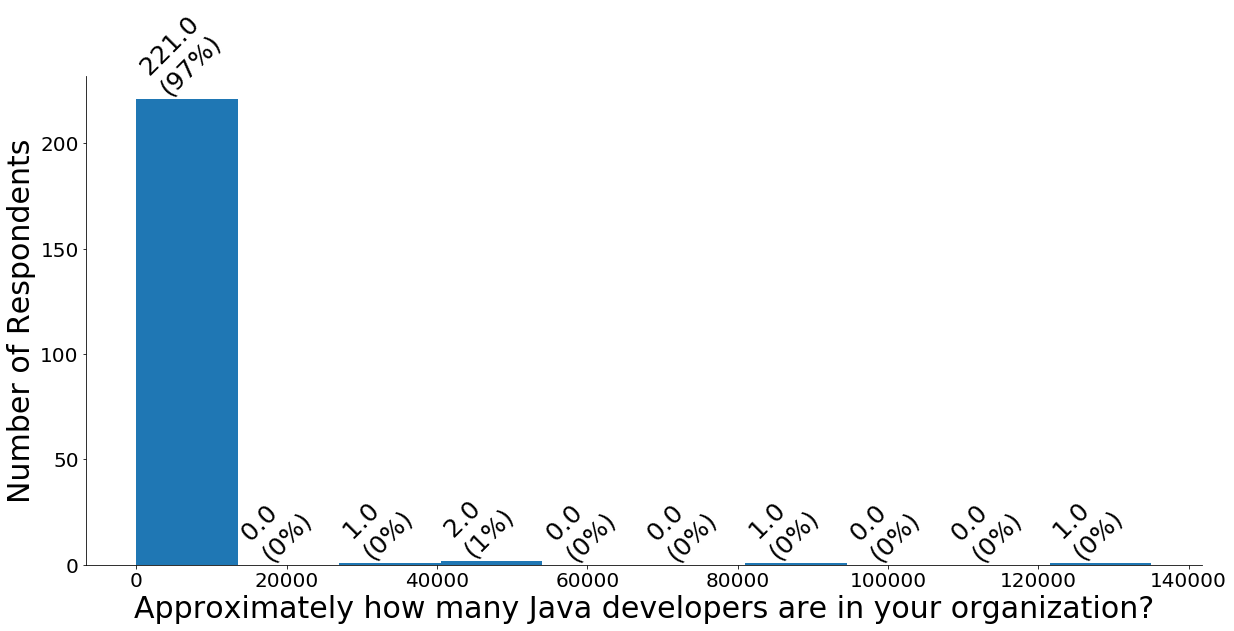

In [344]:
var = "Java_Dev_Org"
var_str = var.replace("_"," ").strip()
temp = modw_df.filter(regex=var).dropna().astype('int32')
temp[var] = [round(t,0) for t in temp[var].astype('int')]

#.sum().sort_values(ascending=True)
# temp = temp.rename(lambda x: x.replace(var,''))

ax = temp.plot.hist(rot=0, fontsize = 20,legend=None)
for p in ax.patches:
    ann_txt = str(p.get_height()) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
    ax.set_xlabel("Approximately how many Java developers are in your organization?", size =30)
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=45)

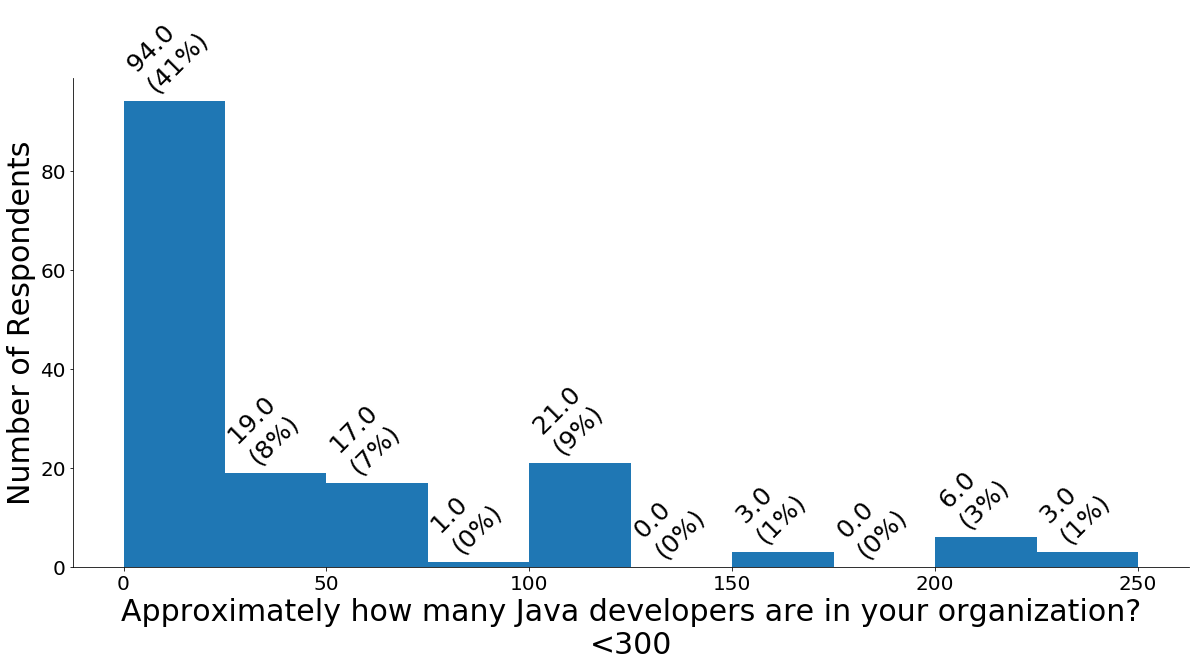

In [340]:
var = "Java_Dev_Org"
var_str = var.replace("_"," ").strip()
temp = modw_df.filter(regex=var).dropna().astype('int32')
temp = temp[temp<300]

#.sum().sort_values(ascending=True)
# temp = temp.rename(lambda x: x.replace(var,''))

ax = temp.plot.hist(rot=0, fontsize = 20,legend=None)
for p in ax.patches:
    ann_txt = str(p.get_height()) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
    ax.set_xlabel("Approximately how many Java developers are in your organization?\n<300", size =30)
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=45)

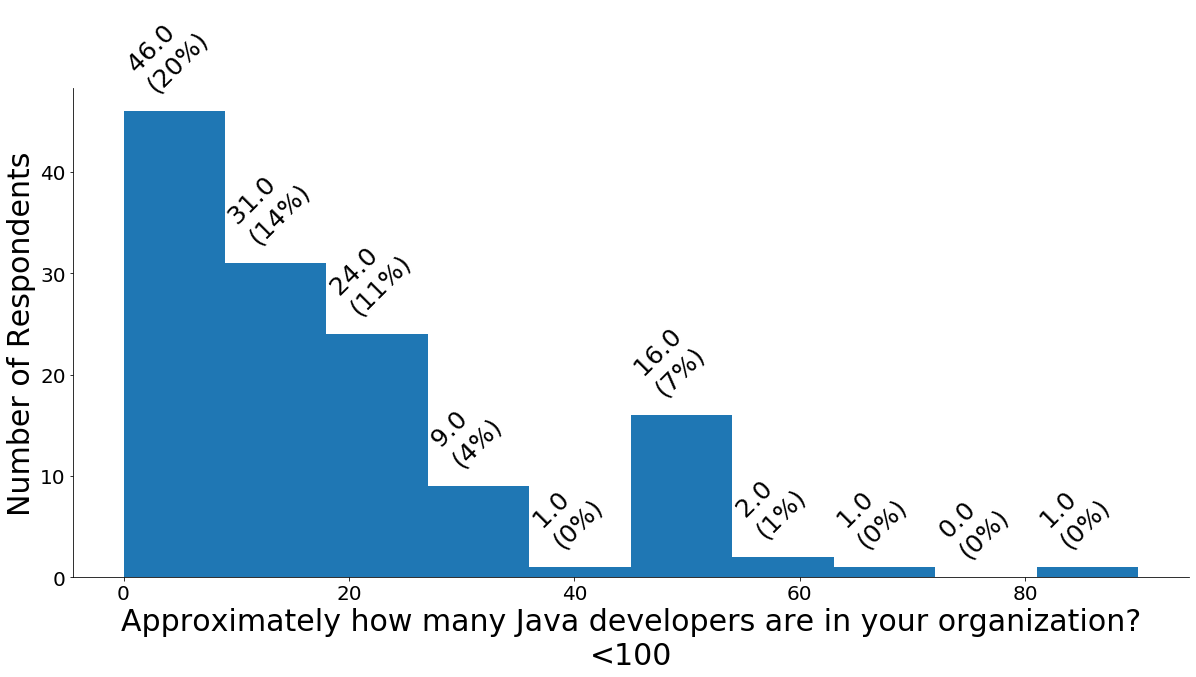

In [339]:
var = "Java_Dev_Org"
var_str = var.replace("_"," ").strip()
temp = modw_df.filter(regex=var).dropna().astype('int32')
temp = temp[temp<100]

#.sum().sort_values(ascending=True)
# temp = temp.rename(lambda x: x.replace(var,''))

ax = temp.plot.hist(rot=0, fontsize = 20,legend=None)
for p in ax.patches:
    ann_txt = str(p.get_height()) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
    ax.set_xlabel("Approximately how many Java developers are in your organization?\n<100", size =30)
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=45)

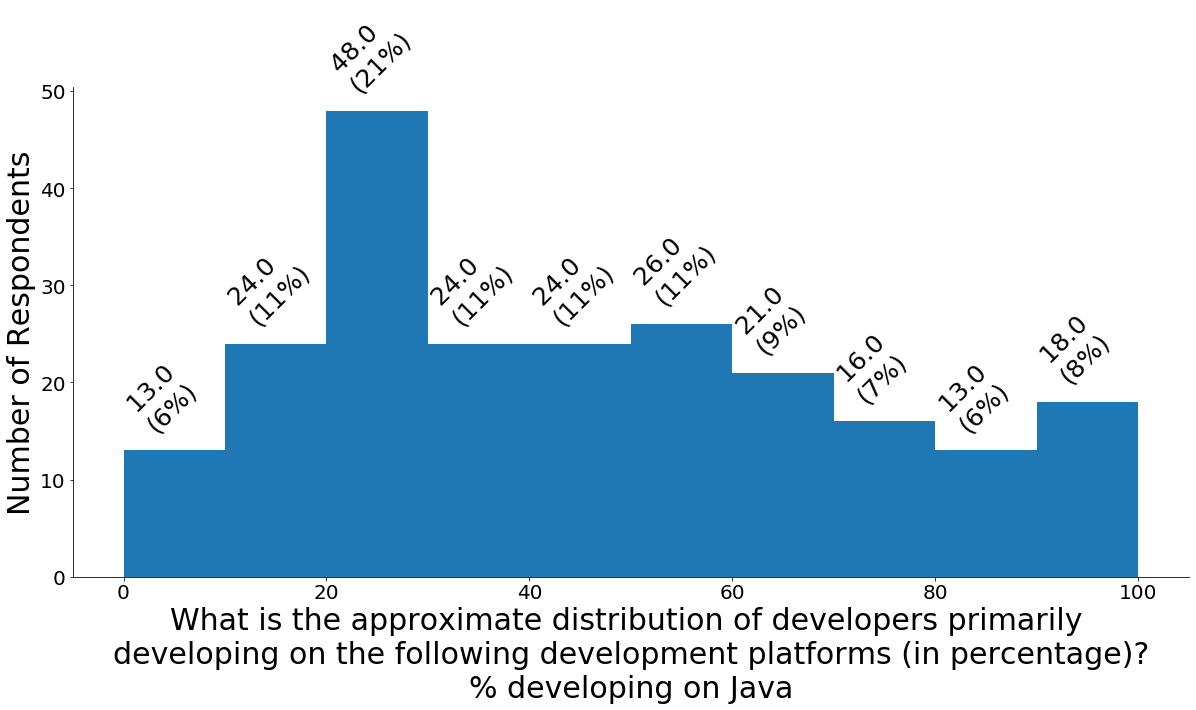

In [345]:
var = "Java_Dev_Dist_Org" #  'Java_Dev_Dist_Org',
#  'Java_Dev_Dist_JVM',
#  'Java_Dev_Dist_Python',
#  'Java_Dev_Dist_JavaScript',
var_str = var.replace("_"," ").strip()
temp = modw_df.filter(regex=var).dropna().astype('int32')
temp = temp.astype('int')

#.sum().sort_values(ascending=True)
# temp = temp.rename(lambda x: x.replace(var,''))

ax = temp.plot.hist(rot=0, fontsize = 20,legend=None)
for p in ax.patches:
    ann_txt = str(int(round(p.get_height(),0))) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
    ax.set_xlabel("What is the approximate distribution of developers primarily \ndeveloping on the following development platforms (in percentage)?\n% developing on Java", size =30)
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=45)

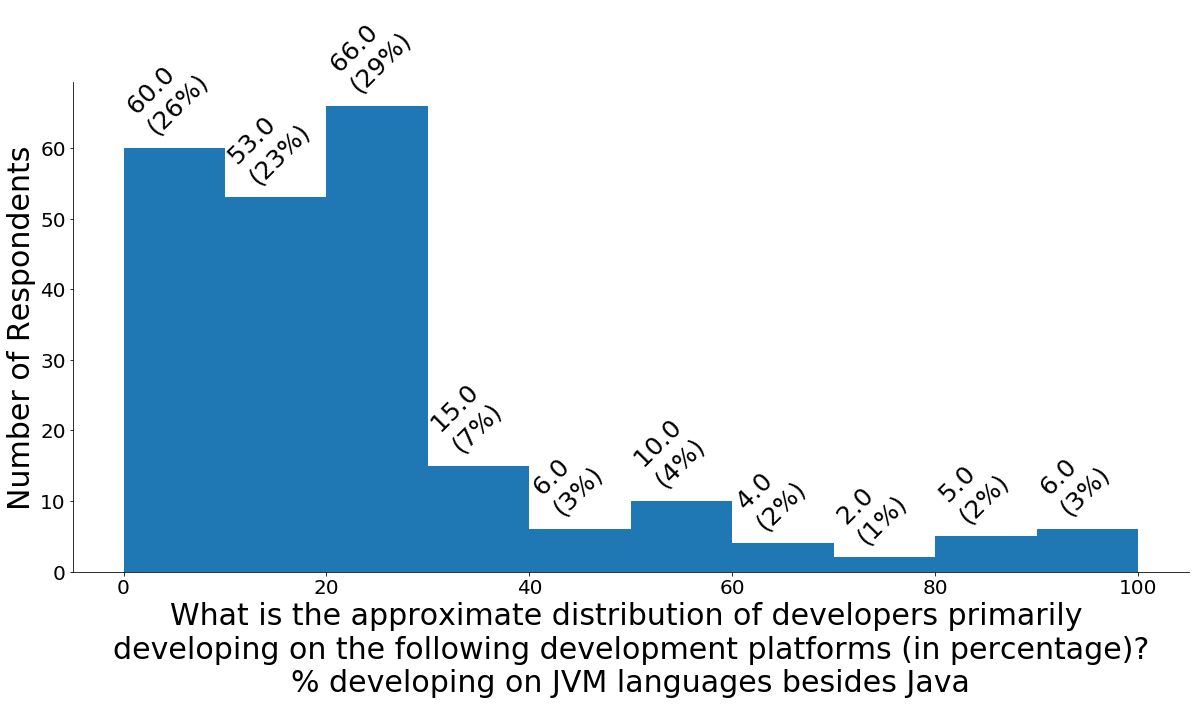

In [347]:
var = "Java_Dev_Dist_JVM" #  'Java_Dev_Dist_Org',
#  'Java_Dev_Dist_JVM',
#  'Java_Dev_Dist_Python',
#  'Java_Dev_Dist_JavaScript',
var_str = var.replace("_"," ").strip()
temp = modw_df.filter(regex=var).dropna().astype('int32')
temp = temp.astype('int')

#.sum().sort_values(ascending=True)
# temp = temp.rename(lambda x: x.replace(var,''))

ax = temp.plot.hist(rot=0, fontsize = 20,legend=None)
for p in ax.patches:
    ann_txt = str(int(round(p.get_height(),0))) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
    ax.set_xlabel("What is the approximate distribution of developers primarily \ndeveloping on the following development platforms (in percentage)?\n% developing on JVM languages besides Java", size =30)
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=45)

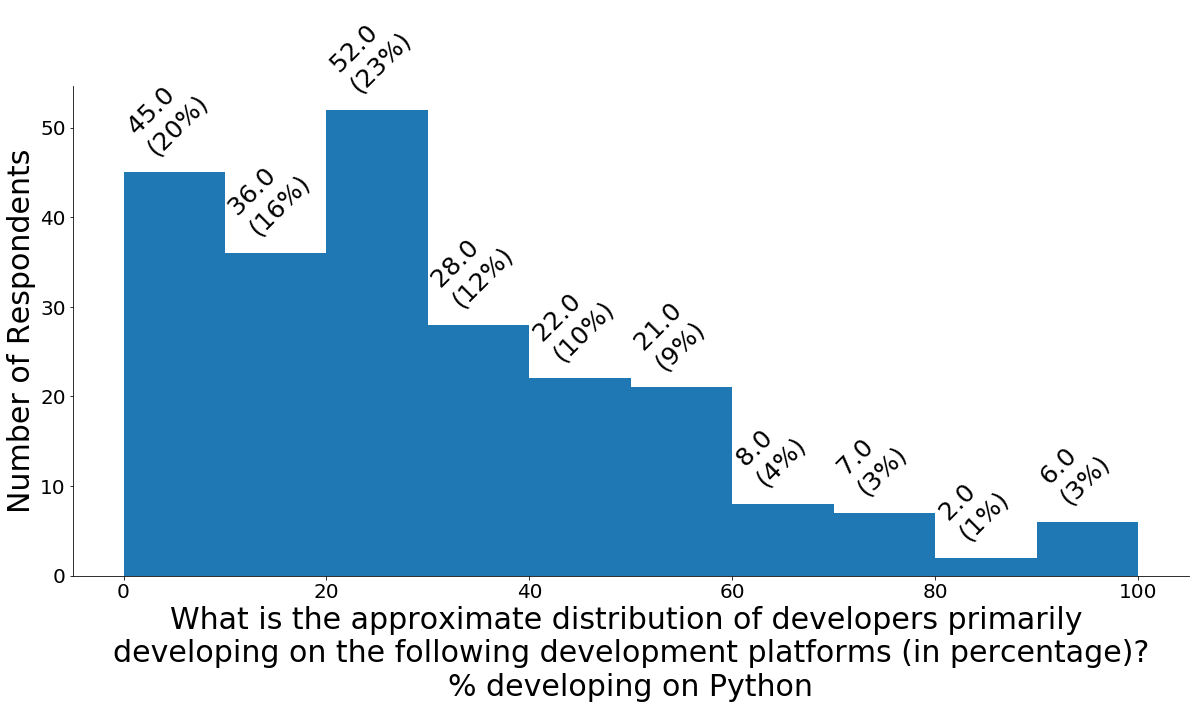

In [349]:
var = "Java_Dev_Dist_Python" #  'Java_Dev_Dist_Org',
#  'Java_Dev_Dist_JVM',
#  'Java_Dev_Dist_Python',
#  'Java_Dev_Dist_JavaScript',
var_str = var.replace("_"," ").strip()
temp = modw_df.filter(regex=var).dropna().astype('int32')
temp = temp.astype('int')

#.sum().sort_values(ascending=True)
# temp = temp.rename(lambda x: x.replace(var,''))

ax = temp.plot.hist(rot=0, fontsize = 20,legend=None)
for p in ax.patches:
    ann_txt = str(int(round(p.get_height(),0))) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
    ax.set_xlabel("What is the approximate distribution of developers primarily \ndeveloping on the following development platforms (in percentage)?\n% developing on Python", size =30)
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=45)

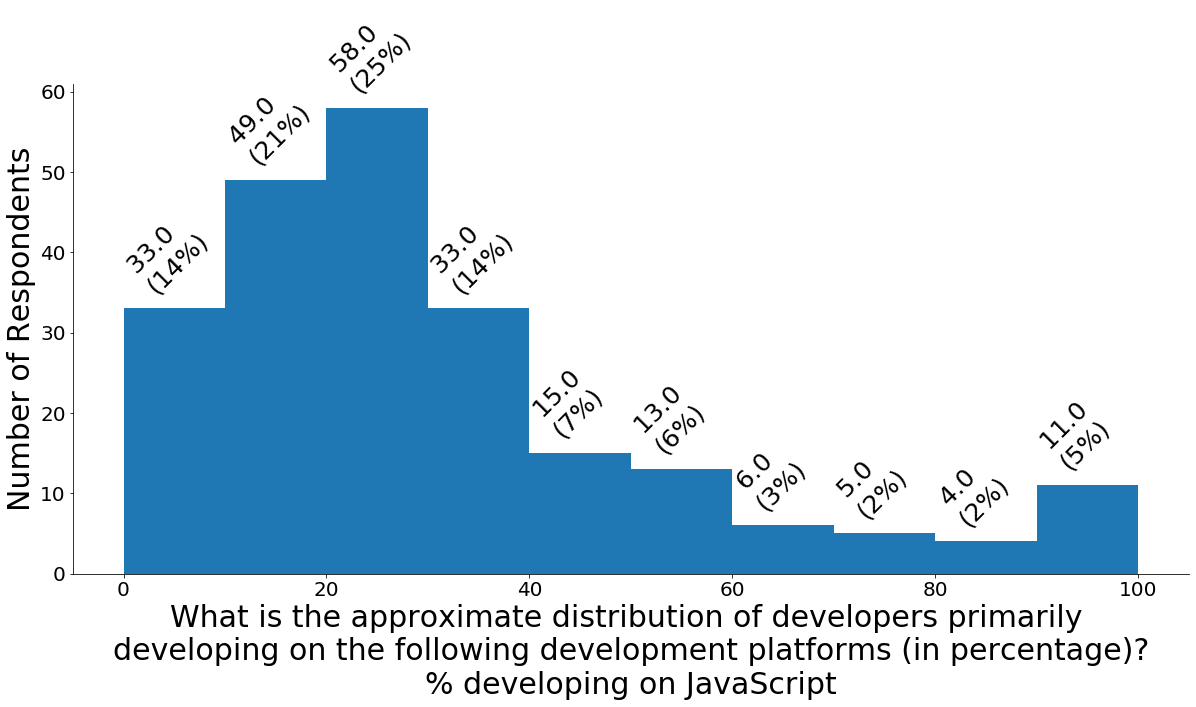

In [350]:
var = "Java_Dev_Dist_JavaScript" #  'Java_Dev_Dist_Org',
#  'Java_Dev_Dist_JVM',
#  'Java_Dev_Dist_Python',
#  'Java_Dev_Dist_JavaScript',
var_str = var.replace("_"," ").strip()
temp = modw_df.filter(regex=var).dropna().astype('int32')
temp = temp.astype('int')

#.sum().sort_values(ascending=True)
# temp = temp.rename(lambda x: x.replace(var,''))

ax = temp.plot.hist(rot=0, fontsize = 20,legend=None)
for p in ax.patches:
    ann_txt = str(int(round(p.get_height(),0))) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
    ax.set_xlabel("What is the approximate distribution of developers primarily \ndeveloping on the following development platforms (in percentage)?\n% developing on JavaScript", size =30)
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=45)

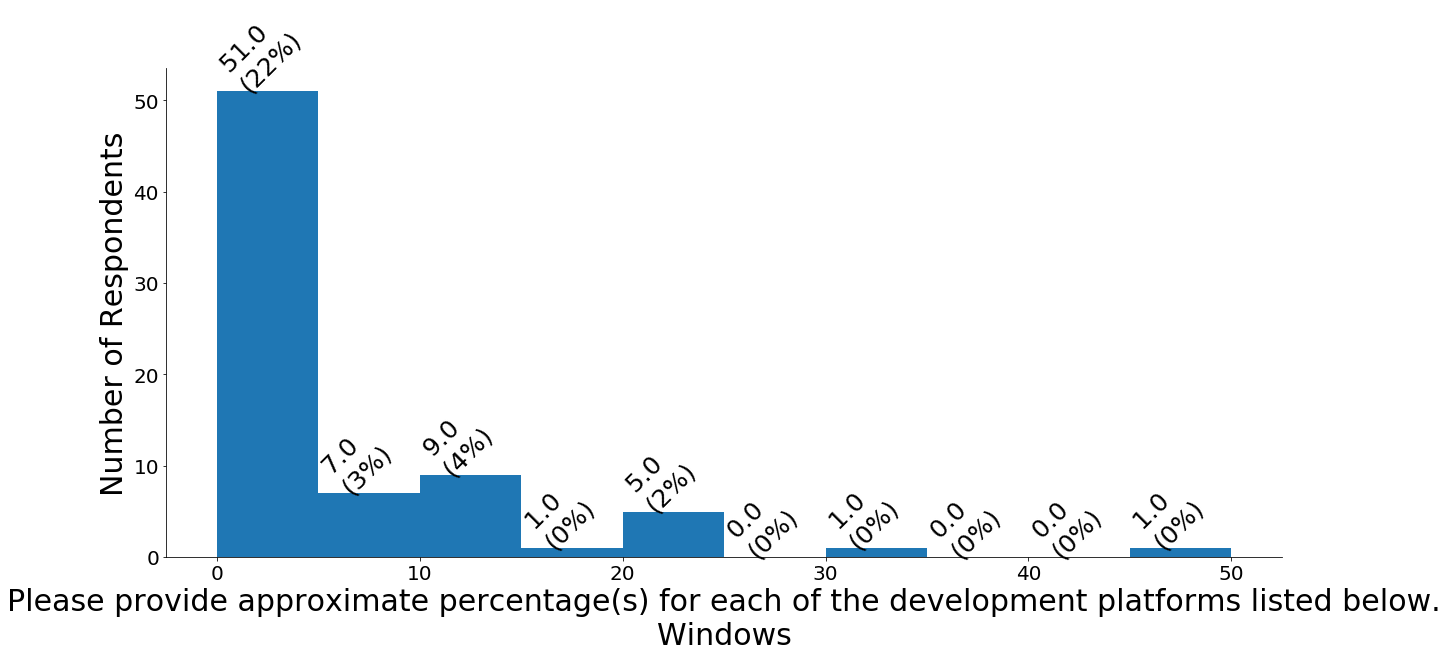

In [22]:
var = "Platform_Dev_Org_Solaris_P" #  Platform_Dev_Org_LRHEL_P',
# Platform_Dev_Org_LOracle_P',
# Platform_Dev_Org_LUbuntu_P',
# Platform_Dev_Org_LSUSE_P',
# Platform_Dev_Org_LinuxOther_P',
# Platform_Dev_Org_MacOS_P',
# Platform_Dev_Org_Solaris_P',
# Platform_Dev_Org_Windows_P',
var_str = var.replace("_"," ").strip()
temp = modw_df.filter(regex=var).dropna().astype('int32')
temp = temp.astype('int')

#.sum().sort_values(ascending=True)
# temp = temp.rename(lambda x: x.replace(var,''))

ax = temp.plot.hist(rot=0, fontsize = 20,legend=None)
for p in ax.patches:
    ann_txt = str(int(round(p.get_height(),0))) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
    ax.set_xlabel("Please provide approximate percentage(s) for each of the development platforms listed below.\nWindows",
                  size=30)
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()), size=25, rotation=45)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x127590a58>]],
      dtype=object)

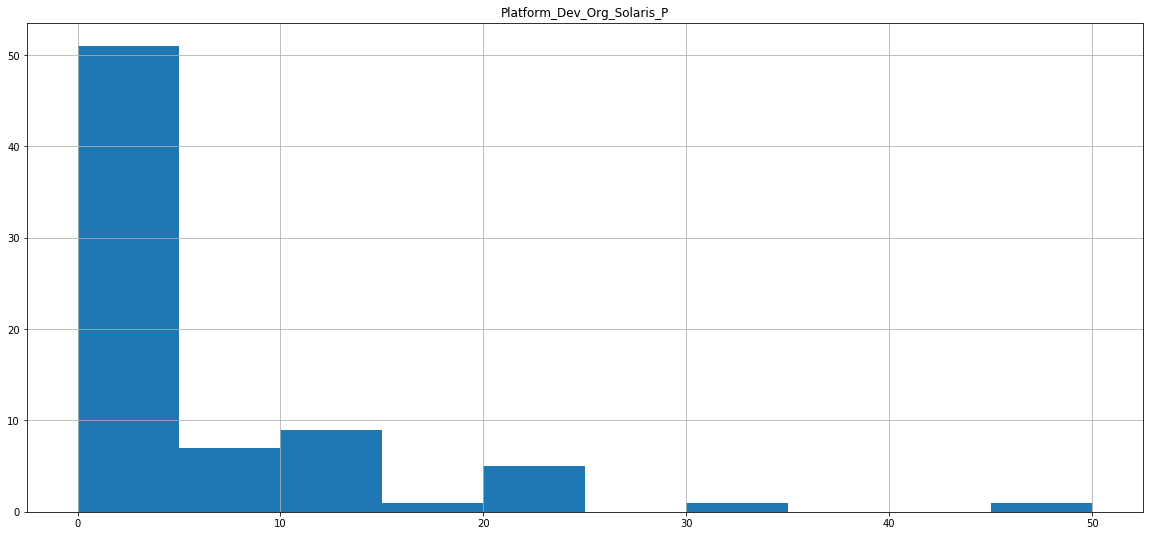

In [26]:
temp.hist()

Platform_Dev_Org_LOracle_P
Platform_Dev_Org_LRHEL_P
Platform_Dev_Org_LSUSE_P
Platform_Dev_Org_LUbuntu_P
Platform_Dev_Org_LinuxOther_P
Platform_Dev_Org_MacOS_P
Platform_Dev_Org_Primary
Platform_Dev_Org_Solaris_P
Platform_Dev_Org_Windows_P


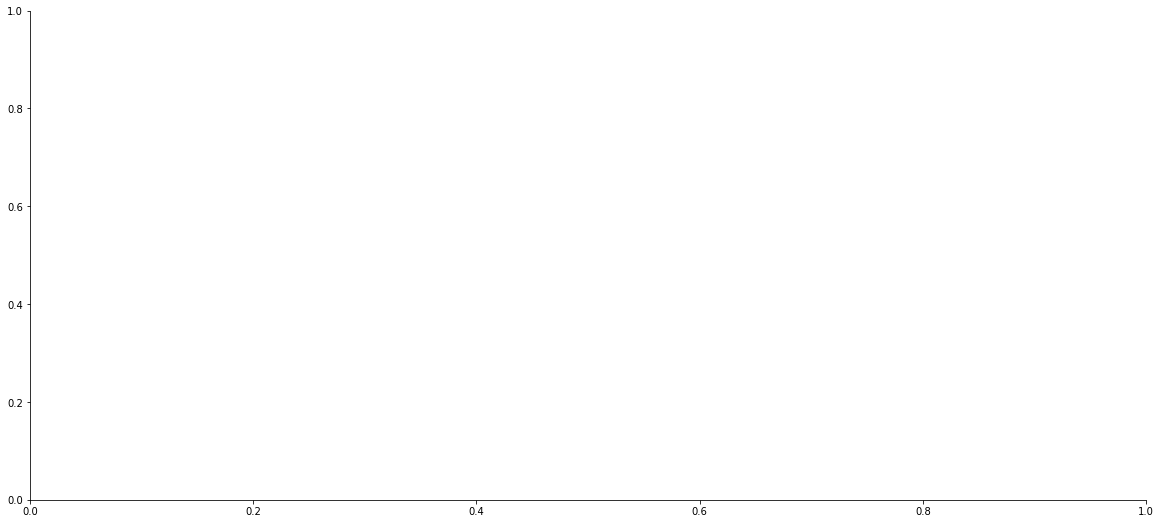

In [27]:
for var in np.unique(varkey['var'][varkey['var'].str.contains('Platform_Dev_Org_')].values):
    print(var)
    temp = modw_df[var].dropna().astype('int32')
    temp = temp.astype('int')
    # temp = varkey.merge(temp.rename('freq'), left_index=True, right_index=True, how='right')
    temp = temp.sort_index()

    var_str = varkey[varkey['var']==var].Q.values[0]
    var_str = '\n'.join(wrap(var_str, 75))


    ax = temp.iloc[:,].plot.hist(rot=45, fontsize = 20,legend=None)

    for p in ax.patches:
        ann_txt = r"""{0} ({1}%)""".format(p.get_height().astype(int), (int(round(p.get_height()/228*100))))

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlabel(var_str, size =30)
        ax.set_ylabel("Number of Respondents", size =30)
        ax.annotate(ann_txt,
                   (p.get_x(), p.get_height()), size=25, rotation=45)
    
    fig = ax.get_figure()
    fig.savefig("../data/output/slides/Platform_Dev_Org/"+var+".jpeg",bbox_inches='tight')
    ax.clear()



In [19]:
var

'Platform_Dev_Org_Windows_P'

In [21]:
temp[temp>90].dropna().shape

(29,)

# Basic Graph - numeric Input w/ Mapping
## used for Sat, Use & Imp vars

In [11]:
var_list = varkey['var'][varkey['var'].str.contains('Use|Imp|Sat')].drop_duplicates().values
var_list[:10]

array(['Use_Org_EclipseIDE', 'Sat_Org_EclipseIDE', 'Use_Org_IntelliJIDE',
       'Sat_Org_IntelliJIDE', 'Use_Org_JDeveloper', 'Sat_Org_JDeveloper',
       'Use_Org_NetBeansIDE', 'Sat_Org_NetBeansIDE',
       'Use_Org_RationalAppDev', 'Sat_Org_RationalAppDev'], dtype=object)

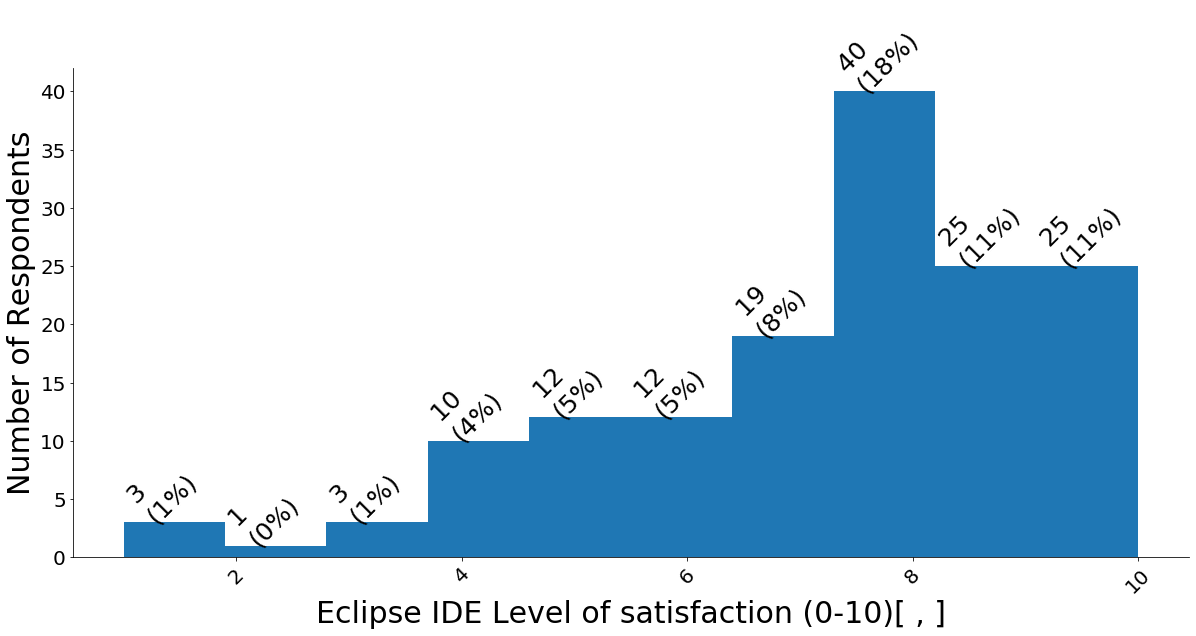

In [461]:
var = var_list[1]

temp = modw_df[var].dropna().astype('int32')
temp = temp.astype('int')
# temp = varkey.merge(temp.rename('freq'), left_index=True, right_index=True, how='right')
temp = temp.sort_index()
temp = temp[temp<228]
temp = temp[temp>0]

var_str = varkey[varkey['var']==var].Q.values[0]
var_str = '\n'.join(wrap(var_str, 75))


ax = temp.iloc[:,].plot.hist(rot=45, fontsize = 20,legend=None)

for p in ax.patches:
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height().astype(int), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()), size=25, rotation=45)


fig = ax.get_figure()
fig.savefig("../data/output/"+var+".jpeg")

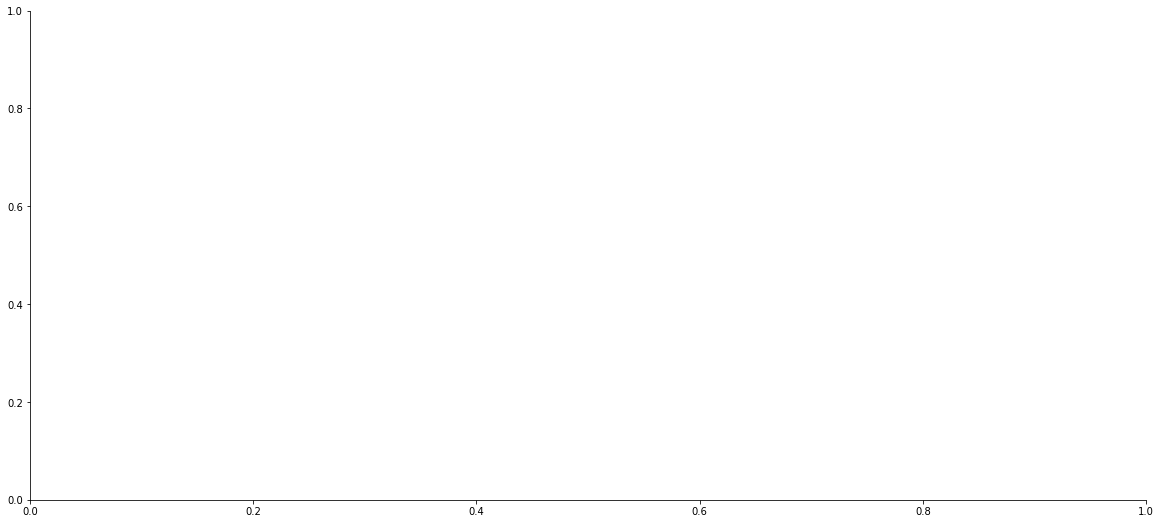

In [37]:
for var in var_list[0:50]:
    temp = modw_df[var].dropna().astype('int32')
    temp = temp.astype('int')
    # temp = varkey.merge(temp.rename('freq'), left_index=True, right_index=True, how='right')
    temp = temp.sort_index()

    var_str = varkey[varkey['var']==var].Q.values[0]
    var_str = '\n'.join(wrap(var_str, 75))


    ax = temp.iloc[:,].plot.hist(rot=45, fontsize = 20,legend=None)

    for p in ax.patches:
        ann_txt = r"""{0} ({1}%)""".format(p.get_height().astype(int), (int(round(p.get_height()/228*100))))

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlabel(var_str, size =30)
        ax.set_ylabel("Number of Respondents", size =30)
        ax.annotate(ann_txt,
                   (p.get_x(), p.get_height()), size=25, rotation=45)
    
    fig = ax.get_figure()
    fig.savefig("../data/output/slides/use_sat_imp/1/"+var+".jpeg",bbox_inches='tight')
    ax.clear()



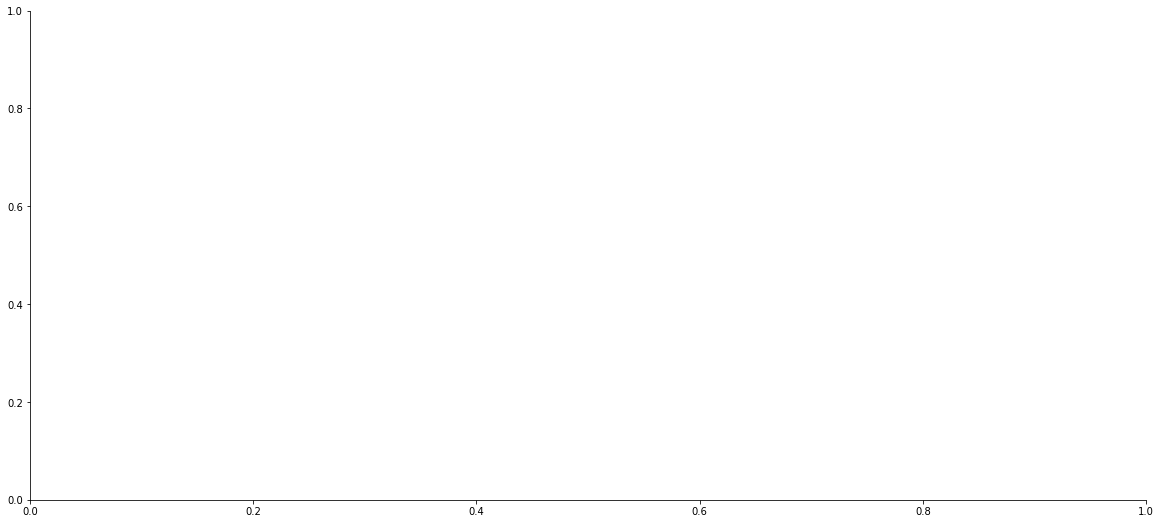

In [30]:
for var in var_list[50:]:
    temp = modw_df[var].dropna().astype('int32')
    temp = temp.astype('int')
    # temp = varkey.merge(temp.rename('freq'), left_index=True, right_index=True, how='right')
    temp = temp.sort_index()

    var_str = varkey[varkey['var']==var].Q.values[0]
    var_str = '\n'.join(wrap(var_str, 75))


    ax = temp.iloc[:,].plot.hist(rot=45, fontsize = 20,legend=None)

    for p in ax.patches:
        ann_txt = r"""{0} ({1}%)""".format(p.get_height().astype(int), (int(round(p.get_height()/228*100))))

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlabel(var_str, size =30)
        ax.set_ylabel("Number of Respondents", size =30)
        ax.annotate(ann_txt,
                   (p.get_x(), p.get_height()), size=25, rotation=45)
    
    fig = ax.get_figure()
    fig.savefig("../data/output/slides/use_sat_imp/2/"+var+".jpeg",bbox_inches='tight')
    ax.clear()



In [31]:
len(var_list)

86

In [33]:
len(var_list[50:])

36

In [36]:
len(var_list[:50])

50

# Mapping Graph
## Used for var =['Job_Title', 'Company_Industry', 'Company_Revenue', 'OracleJavaSESubscription_Org_Duration','Java_App_Org_Deploy_2020', 'OracleJavaSESubscription_Ind_Role', 'Government_Org_Ind_Employee', App_Dev_Outsource, Platform_Dev_Org_Primary]

In [362]:
varkey['var'].drop_duplicates().values

array(['Job_Title', 'Company_Industry', 'Company_Revenue',
       'OracleJavaSESubscription_Org_Duration',
       'Java_App_Org_Deploy_2020', 'OracleJavaSESubscription_Ind_Role',
       'Government_Org_Ind_Employee', 'App_Dev_Outsource',
       'Platform_Dev_Org_Primary'], dtype=object)

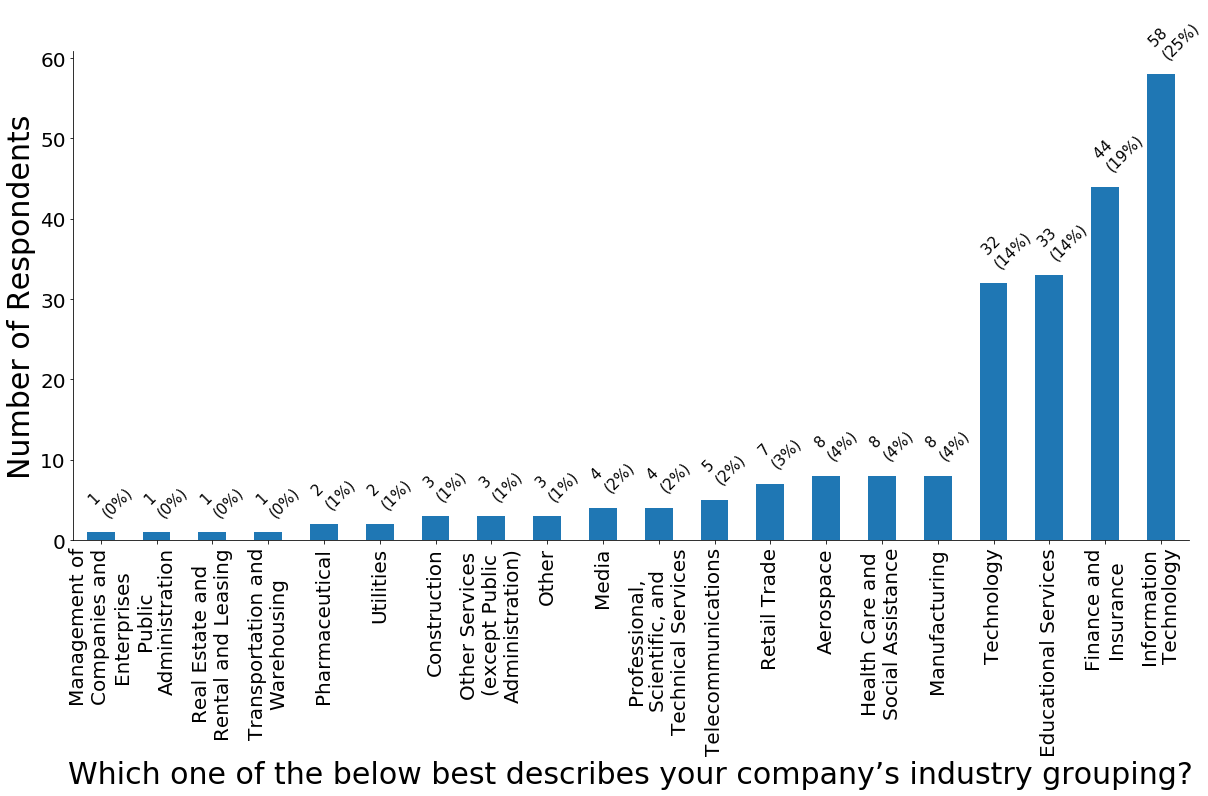

In [72]:
var = 'Company_Industry'
temp = modw_df.filter(regex=var).sum().sort_values(ascending=True)
temp = varkey.merge(temp.rename('freq'), left_index=True, right_index=True, how='right')
temp = temp.sort_index()
temp = temp[temp.freq<228]
temp = temp[temp.freq>0]
temp.freq = temp.freq.astype('int')

var_str = temp.Q.values[0]
var_str = '\n'.join(wrap(var_str, 75))


temp.A =  [ '\n'.join(wrap(l, 20)) for l in temp.A ] 



ax = temp.iloc[:,].sort_values('freq').plot.bar(x='A', y='freq', fontsize = 20,
                                                 legend=None)
for p in ax.patches:
    ann_txt = str(p.get_height()) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
#     ax.get_legend().remove()
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=15, rotation=45)

In [74]:
var = 'Company_Revenue'
temp = modw_df.filter(regex=var).sum().sort_values(ascending=True)
temp = varkey.merge(temp.rename('freq'), left_index=True, right_index=True, how='right')
temp = temp.sort_index()
temp = temp[temp.freq<228]
temp = temp[temp.freq>0]
temp.freq = temp.freq.astype('int')

var_str = temp.Q.values[0]
var_str = '\n'.join(wrap(var_str, 75))


temp.A =  [ '\n'.join(wrap(l, 20)) for l in temp.A ] 



ax = temp.iloc[:,].sort_values('freq').plot.bar(x='A', y='freq', fontsize = 20,
                                                 legend=None)
for p in ax.patches:
    ann_txt = str(p.get_height()) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
#     ax.get_legend().remove()
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=45)

In [67]:
var = 'Company_Industry'
temp

var   val                                                                        Q                                                 A A_short  grp grp_str  freq
Company_Industry_10  Company_Industry  10.0  Which one of the below best describes your company’s industry grouping?           Management of Companies and Enterprises     NaN  NaN     NaN     1
Company_Industry_11  Company_Industry  11.0  Which one of the below best describes your company’s industry grouping?                                     Manufacturing     NaN  NaN     NaN     8
Company_Industry_12  Company_Industry  12.0  Which one of the below best describes your company’s industry grouping?                                             Media     NaN  NaN     NaN     4
Company_Industry_14  Company_Industry  14.0  Which one of the below best describes your company’s industry grouping?     Other Services (except Public Administration)     NaN  NaN     NaN     3
Company_Industry_15  Company_Industry  15.0  Which one of the below best describes your company’s industry grouping?                                    Pharmaceutical     NaN  NaN     NaN     2
Company_Industry_16  Company_Industry  16.0  Which one of the below best describes your company’s industry grouping?  Professional, Scientific, and Technical Services     NaN  NaN     NaN     4
Company_Industry_17  Company_Industry  17.0  Which one of the below best describes your company’s industry grouping?                             Public Administration     NaN  NaN     NaN     1
Company_Industry_18  Company_Industry  18.0  Which one of the below best describes your company’s industry grouping?                Real Estate and Rental and Leasing     NaN  NaN     NaN     1
Company_Industry_19  Company_Industry  19.0  Which one of the below best describes your company’s industry grouping?                                      Retail Trade     NaN  NaN     NaN     7
Company_Industry_2   Company_Industry   2.0  Which one of the below best describes your company’s industry grouping?                                         Aerospace     NaN  NaN     NaN     8
Company_Industry_20  Company_Industry  20.0  Which one of the below best describes your company’s industry grouping?                                        Technology     NaN  NaN     NaN    32
Company_Industry_21  Company_Industry  21.0  Which one of the below best describes your company’s industry grouping?                                Telecommunications     NaN  NaN     NaN     5
Company_Industry_22  Company_Industry  22.0  Which one of the below best describes your company’s industry grouping?                    Transportation and Warehousing     NaN  NaN     NaN     1
Company_Industry_23  Company_Industry  23.0  Which one of the below best describes your company’s industry grouping?                                         Utilities     NaN  NaN     NaN     2
Company_Industry_25  Company_Industry  25.0  Which one of the below best describes your company’s industry grouping?                                             Other     NaN  NaN     NaN     3
Company_Industry_5   Company_Industry   5.0  Which one of the below best describes your company’s industry grouping?                                      Construction     NaN  NaN     NaN     3
Company_Industry_6   Company_Industry   6.0  Which one of the below best describes your company’s industry grouping?                              Educational Services     NaN  NaN     NaN    33
Company_Industry_7   Company_Industry   7.0  Which one of the below best describes your company’s industry grouping?                             Finance and Insurance     NaN  NaN     NaN    44
Company_Industry_8   Company_Industry   8.0  Which one of the below best describes your company’s industry grouping?                 Health Care and Social Assistance     NaN  NaN     NaN     8
Company_Industry_9   Company_Industry   9.0  Which one of the below best describes your company’s industry grouping?                            Informatio

In [50]:
varkey

var   val                                                                                                                                                                                                                                                                                                                                  Q                                                                                                                                                            A                                             A_short  grp            grp_str
Job_Title_1.0                                                                                              Job_Title   1.0                                                                                                                                                                                                                                                                                                            What is your job title?                                                                                                                                                   CIO or CTO                                                 NaN  1.0         Teach Lead
Job_Title_2.0                                                                                              Job_Title   2.0                                                                                                                                                                                                                                                                                                            What is your job title?                                                                                                                                       IT Director or Manager                                                 NaN  1.0         Teach Lead
Job_Title_3.0                                                                                              Job_Title   3.0                                                                                                                                                                                                                                                                                                            What is your job title?                                                                                                                                        Application Developer                                                 NaN  2.0  Application Owner
Job_Title_4.0                                                                                              Job_Title   4.0                                                                                                                                                                                                                                                                                                            What is your job title?                                                                                                                                          Application Manager                                                 NaN  2.0  Application Owner
Job_Title_5.0                                                                                              Job_Title   5.0                                                                                                                                                                                                                                                                                                            What is your job title?                                                                                                                                 Application Development Lead                                                 NaN  2.0  Application Owner
Job_Title_6.0                          

In [49]:
var_key.merge(temp.rename('freq'), left_index=True, right_index=True, how='right')

NameError: name 'var_key' is not defined

# Mapping Graph Additionals - A_short
## used for: ['OracleJavaSESubscription_Ind_Role']

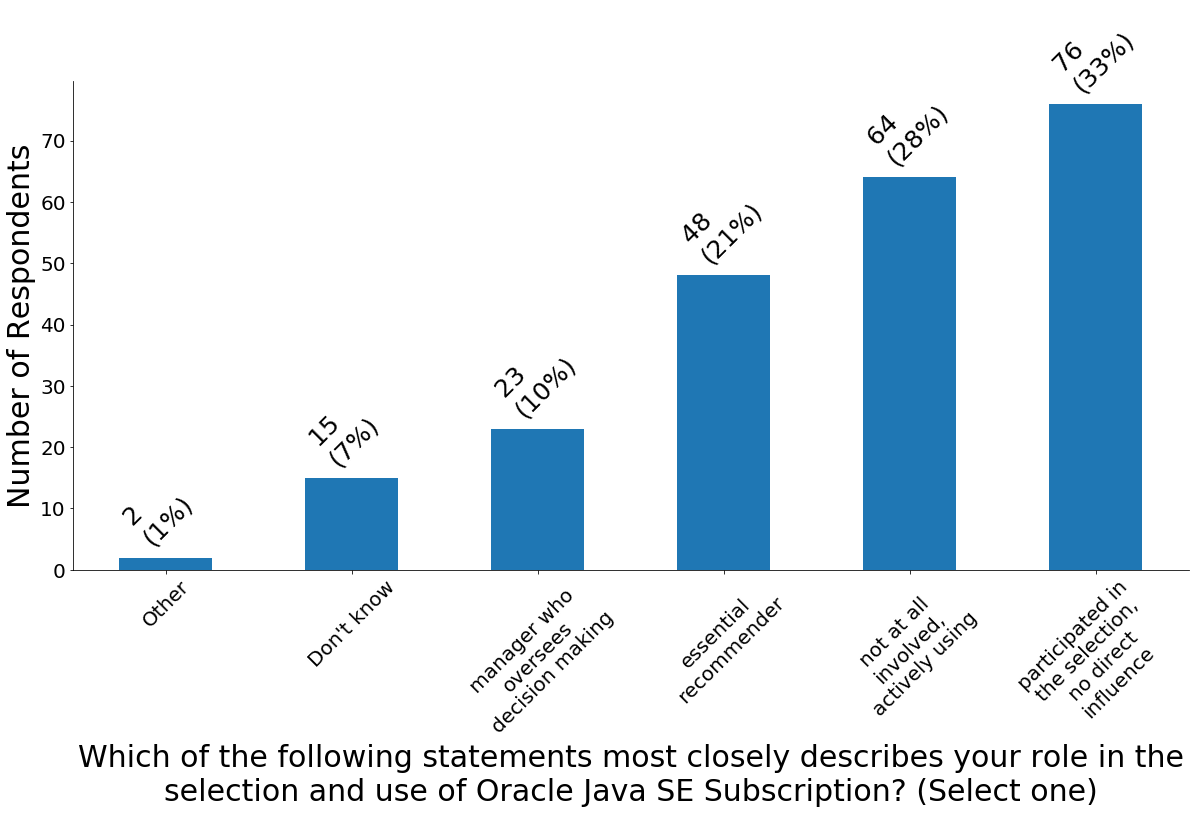

In [277]:
var = 'OracleJavaSESubscription_Ind_Role'
temp = modw_df.filter(regex=var).sum().sort_values(ascending=True)
temp = varkey.merge(temp.rename('freq'), left_index=True, right_index=True, how='right')
temp = temp.sort_index()
temp = temp[temp.freq<228]
temp.freq = temp.freq.astype('int')
temp = temp.iloc[:-1,]

var_str = temp.Q.values[0]
var_str = '\n'.join(wrap(var_str, 75))
temp.A_short =  [ '\n'.join(wrap(l, 15)) for l in temp.A_short ] 


ax = temp.iloc[:,].sort_values('freq').plot.bar(x='A_short', y='freq', 
                                                  rot=45, fontsize = 20,
                                                 legend=None)
for p in ax.patches:
    ann_txt = str(p.get_height()) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
#     ax.set_xticks()
    ax.set_ylabel("Number of Respondents", size =30)
#     ax.get_legend().remove()
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=45)

# Mapping Graph Additionals - grp_str
## used for var = ['Job_Title','OracleJavaSESubscription_Ind_Role']

In [191]:
# job title by group
var = 'Job_Title'
temp = modw_df.filter(regex=var).sum().sort_values(ascending=True)
temp = varkey.merge(temp.rename('freq'), left_index=True, right_index=True, how='right')
temp = temp.sort_index()
temp = temp[temp.freq<228]
temp.freq = temp.freq.astype('int')
temp = temp.groupby(['var',  'Q','grp', 'grp_str'],as_index=False)['freq'].agg('sum')

var_str = temp.Q.values[0]


ax = temp.iloc[:,].sort_values('freq').plot.bar(x='grp_str', y='freq', 
                                                  rot=45, fontsize = 20,
                                                 legend=None)
for p in ax.patches:
    ann_txt = str(p.get_height()) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
#     ax.get_legend().remove()
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=45)

In [238]:
# job title by group
var = 'OracleJavaSESubscription_Ind_Role'
temp = modw_df.filter(regex=var).sum().sort_values(ascending=True)
temp = varkey.merge(temp.rename('freq'), left_index=True, right_index=True, how='right')
temp = temp.sort_index()
temp = temp[temp.freq<228]
temp.freq = temp.freq.astype('int')
temp = temp.groupby(['var',  'Q','grp', 'grp_str'],as_index=False)['freq'].agg('sum')

var_str = temp.Q.values[0]
var_str = '\n'.join(wrap(var_str, 75))

ax = temp.iloc[:,].sort_values('freq').plot.bar(x='grp_str', y='freq', 
                                                  rot=45, fontsize = 20,
                                                 legend=None)
for p in ax.patches:
    ann_txt = str(p.get_height()) + "=" + str((int(round(p.get_height()/228*100))))+"%"
    
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height(), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel(var_str, size =30)
    ax.set_ylabel("Number of Respondents", size =30)
#     ax.get_legend().remove()
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=45)

In [189]:
temp.groupby(['var',  'Q','grp', 'grp_str'],as_index=False)['freq'].agg('sum')

var                        Q  grp            grp_str  freq
0  Job_Title  What is your job title?  1.0         Teach Lead    49
1  Job_Title  What is your job title?  2.0  Application Owner   144
2  Job_Title  What is your job title?  3.0              Other    35

In [110]:
temp = modw_df.filter(regex=var).sum().sort_values(ascending=True)
temp = varkey.merge(temp.rename('freq'), left_index=True, right_index=True, how='right')
temp = temp.sort_index()
temp

var   val                                                                        Q                                                 A  grp grp_str    freq
Company_Industry                      NaN   NaN                                                                      NaN                                               NaN  NaN     NaN  2461.0
Company_Industry_10      Company_Industry  10.0  Which one of the below best describes your company’s industry grouping?           Management of Companies and Enterprises  NaN     NaN     1.0
Company_Industry_11      Company_Industry  11.0  Which one of the below best describes your company’s industry grouping?                                     Manufacturing  NaN     NaN     8.0
Company_Industry_12      Company_Industry  12.0  Which one of the below best describes your company’s industry grouping?                                             Media  NaN     NaN     4.0
Company_Industry_14      Company_Industry  14.0  Which one of the below best describes your company’s industry grouping?     Other Services (except Public Administration)  NaN     NaN     3.0
Company_Industry_15      Company_Industry  15.0  Which one of the below best describes your company’s industry grouping?                                    Pharmaceutical  NaN     NaN     2.0
Company_Industry_16      Company_Industry  16.0  Which one of the below best describes your company’s industry grouping?  Professional, Scientific, and Technical Services  NaN     NaN     4.0
Company_Industry_17      Company_Industry  17.0  Which one of the below best describes your company’s industry grouping?                             Public Administration  NaN     NaN     1.0
Company_Industry_18      Company_Industry  18.0  Which one of the below best describes your company’s industry grouping?                Real Estate and Rental and Leasing  NaN     NaN     1.0
Company_Industry_19      Company_Industry  19.0  Which one of the below best describes your company’s industry grouping?                                      Retail Trade  NaN     NaN     7.0
Company_Industry_2       Company_Industry   2.0  Which one of the below best describes your company’s industry grouping?                                         Aerospace  NaN     NaN     8.0
Company_Industry_20      Company_Industry  20.0  Which one of the below best describes your company’s industry grouping?                                        Technology  NaN     NaN    32.0
Company_Industry_21      Company_Industry  21.0  Which one of the below best describes your company’s industry grouping?                                Telecommunications  NaN     NaN     5.0
Company_Industry_22      Company_Industry  22.0  Which one of the below best describes your company’s industry grouping?                    Transportation and Warehousing  NaN     NaN     1.0
Company_Industry_23      Company_Industry  23.0  Which one of the below best describes your company’s industry grouping?                                         Utilities  NaN     NaN     2.0
Company_Industry_25      Company_Industry  25.0  Which one of the below best describes your company’s industry grouping?                                             Other  NaN     NaN     3.0
Company_Industry_5       Company_Industry   5.0  Which one of the below best describes your company’s industry grouping?                                      Construction  NaN     NaN     3.0
Company_Industry_6       Company_Industry   6.0  Which one of the below best describes your company’s industry grouping?                              Educational Services  NaN     NaN    33.0
Company_Industry_7       Company_Industry   7.0  Which one of the below best describes your company’s industry grouping?                             Finance and Insurance  NaN     NaN    44.0
Company_Industry_8       Company_Industry   8.0  Which one of the below best describes your company’s industry grouping?                 Health Care and Social Assistance  NaN     NaN     8.0
Compan

In [63]:
modw_df.filter(regex=var).sum().sort_values(ascending=True)

Job_Title_Other      0.0
Job_Title_1          7.0
Job_Title_4         18.0
Job_Title_5         34.0
Job_Title_8         35.0
Job_Title_2         42.0
Job_Title_3         92.0
Job_Title          889.0
dtype: float64

# Number of individuals selecting OJavaSESubscription_Alts_Top3_ options

In [43]:
temp = modw_df.filter(regex='OJavaSESubscription_Alts_Top3_').sum().sort_values(ascending=False)
temp = temp.rename(lambda x: x.replace('OJavaSESubscription_Alts_Top3_',''))
ax = temp.plot.bar(fontsize = 20,legend=None)
for p in ax.patches:
    ann_txt = r"""{0} 
({1}%)""".format(p.get_height().astype(int), (int(round(p.get_height()/228*100))))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel("Please check the top 3 reasons for which you would consider \nalternatives to Oracle Java SE Subscription.", size =30)
    ax.set_ylabel("Number of Respondents \nSelecting Option as Top 3", size =30)
#     ax.get_legend().remove()
#     ax.spines['left'].set_visible(False)
#     ax.set_yticks([])
    ax.annotate(ann_txt,
               (p.get_x(), p.get_height()+2), size=25, rotation=45)